# Advanced Regression Assignment

## Problem Statement

#### Surprise Housing, US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

#### The company is looking at prospective properties to enter the market. We are going to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


#### The company wants to know: The variables which are significant in predicting the price of a house and how well those variables describe the price of a house.

## Business Goal

#### Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In the given dataset, <font size=3pt family='verdana' style='italic' color='red'> SalePrice</font> is the target variable

### Solution
The solution is divided into the following steps involved:
1. Data Understanding and Exploration
2. Data Processing
    1. Data Cleaning: 
        1. Checking for missing values
        2. Checking for highly skewed variables & outliers
        3. Treating outliers.
    2. Data Preparation: 
        1. Dummy Variable Creation
        2. Train-Test Split
        3. Scaling
    3. Feature Selection using RFE/Lasso
3. Model Building -
    Using Cross Validation technique to build both Ridge and Lasso Models.
4. Subjective Question Part.


## 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [24]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

#### 1. a. Reading the data

In [37]:
# Checking the encoding of day file
with open("train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


###### Insights:
The default encoding of 'train.csv' file is detected as 'ascii' with 100% confidence level. Hence, we can proceed.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [40]:
housing_df = pd.read_csv("train.csv", encoding='palmos')

# Way to display & see the column names
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### 1. b. Understanding the data

In [41]:
# Check the data infoormation of the dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
# To count the number of dtypes in the given object.
housing_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

###### Insights:
The dataframe, housing_df
+ Is having 1460 data and 81 features
+ dtypes: float64(3), int64(35), object(43)
+ memory usage of the dataframe: 924.0+ KB

##### Removing irrelevant column

Id - is the unique key and MoSold: Month Sold (MM).

In [43]:
##Removing 'Id' and 'MoSold' columns as they are trivial for our analysis
housing_df.drop(['Id','MoSold'], axis=1, inplace=True)

## 2. Data Processing

#### Common Functions

General function to print missing values

In [44]:
def get_MissingValues(df):
    cols = []
    column_with_nan = df.columns[df.isnull().any()]
    for column in column_with_nan:
        nullsum = df[column].isnull().sum()
        percent_missing = round(nullsum * 100 / len(df),2)        
        cols.append({'colname':column,'percentage':percent_missing,'featureDtype':str(df[column].dtype)})  
    
    if len(cols) > 0:     
        # Creates DataFrame. 
        print(f'{len(cols)} features have missing value')
        missingDF = pd.DataFrame(cols).sort_values(by=['percentage'], ascending=False)
    else:
        missingDF = "No missingValues"
        
    return missingDF

Function to get a list of features for provided datatype

In [45]:
def get_colsofType(df,featureType):
    return df.select_dtypes(include=featureType)

### Checking Missing Values

In [46]:
missingcols = get_MissingValues(housing_df)
missingcols

19 features have missing value


colname  percentage featureDtype
16        PoolQC       99.52       object
18   MiscFeature       96.30       object
1          Alley       93.77       object
17         Fence       80.75       object
10   FireplaceQu       47.26       object
0    LotFrontage       17.74      float64
11    GarageType        5.55       object
12   GarageYrBlt        5.55      float64
13  GarageFinish        5.55       object
14    GarageQual        5.55       object
15    GarageCond        5.55       object
6   BsmtExposure        2.60       object
8   BsmtFinType2        2.60       object
7   BsmtFinType1        2.53       object
5       BsmtCond        2.53       object
4       BsmtQual        2.53       object
3     MasVnrArea        0.55      float64
2     MasVnrType        0.55       object
9     Electrical        0.07       object

### Imputing Missing Values with respect to feature type

#### Imputing Missing values for Numerical features

Get numeric features

In [47]:
numeric_features_df=get_colsofType(df=housing_df, featureType=['int64','float64','int32','float32'])
numeric_features_columns = numeric_features_df.columns.tolist()
print(f'Numeric Features dataframe Shape : {numeric_features_df.shape}\n')
print(f'Numeric Features : {numeric_features_columns}')

Numeric Features dataframe Shape : (1460, 36)

Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']


Check Missing values in Numeric columns

In [48]:
missingcols_numdf = get_MissingValues(numeric_features_df)
missingcols_numdf

3 features have missing value


colname  percentage featureDtype
0  LotFrontage       17.74      float64
2  GarageYrBlt        5.55      float64
1   MasVnrArea        0.55      float64

Working with LotFrontage    

In [49]:
print("LotFrontage Stats:\n",housing_df.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64


Impute the 'LotFrontage' with median, as the mean (70.05) and median(69) are quite close to each other.

In [50]:
housing_df['LotFrontage'] = housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())

Working with GarageYrBlt    

Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

In [51]:
housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

Working with MasVnrArea      

In [52]:
print("\nMasVnrArea Stats:\n",housing_df.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


For 'MasVnrArea', a lot of values are 0.0. So considering the stats excluding 0.0.

In [53]:
##For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile to get a more precise value.
updated_MasVnrArea = housing_df.MasVnrArea[~(housing_df.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Impute the nulls with median(203) as there as some outliers present

In [54]:
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [55]:
get_MissingValues(housing_df[numeric_features_columns])

'No missingValues'

No Missing values in Numerical columns. All missing values got imputed

#### Imputing Missing values for categorical features

Get Categorical features

In [56]:
category_features_df=get_colsofType(df=housing_df, featureType=['object'])
categorical_features_columns = category_features_df.columns.tolist()

print(f'Categorical Features dataframe Shape : {category_features_df.shape}\n')
print(f'Categorical Features : {categorical_features_columns}')

Categorical Features dataframe Shape : (1460, 43)

Categorical Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Check Missing values in Categorical columns

In [57]:
missingcols_catdf = get_MissingValues(category_features_df)
missingcols_catdf

16 features have missing value


colname  percentage featureDtype
13        PoolQC       99.52       object
15   MiscFeature       96.30       object
0          Alley       93.77       object
14         Fence       80.75       object
8    FireplaceQu       47.26       object
9     GarageType        5.55       object
10  GarageFinish        5.55       object
11    GarageQual        5.55       object
12    GarageCond        5.55       object
4   BsmtExposure        2.60       object
6   BsmtFinType2        2.60       object
2       BsmtQual        2.53       object
3       BsmtCond        2.53       object
5   BsmtFinType1        2.53       object
1     MasVnrType        0.55       object
7     Electrical        0.07       object

#### Insights 
+ Missing value columns for categorical variables, hence imputing with 
    + Values present for NA values from data-dictionary

Imputing missing values for categorical features

In [58]:
# Fetching the colnames of categorical features
missing_catcols = list(missingcols_catdf['colname']) # Converting to list as the output is Series
print(f'Imputing Categorical columns: \n{missing_catcols}')

for column in missing_catcols:             
    # Imputing Garage related features as 'No Garage' as per data dictionary.
    if  column == 'GarageType' or column == 'GarageFinish':
        housing_df[column] = housing_df[column].fillna('No Garage')
            
    # Imputing MasVnrType as 'None' and corresponding MasVnrArea value as per data dictionary.
    elif column == 'MasVnrType':
        housing_df.MasVnrType = housing_df.MasVnrType.fillna('None')
    
    # Imputing Basement related features as 'No Basement' as per data dictionary.
    elif  column == 'BsmtQual' or column == 'BsmtExposure' or column == 'BsmtFinType1':
        housing_df[column] = housing_df[column].fillna('No Basement')  
        
    else:
        housing_df[column] = housing_df[column].fillna('None')

Imputing Categorical columns: 
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [59]:
get_MissingValues(housing_df[categorical_features_columns])

'No missingValues'

No Missing values in Categorical columns. All missing values got imputed

In [60]:
missingcols_numdf = get_MissingValues(housing_df)
missingcols_numdf

'No missingValues'

All missing values got imputed. No Missing values in the dataset. 

### Data Visualisation

In [61]:
# Removing the 'SalePrice' from numerical feature column as it is the target variable
numeric_features_columns.pop()

'SalePrice'

In [62]:
# Display the count of numeric_features_columns
print(f'numeric_features_columns count : {len(numeric_features_columns)}\n{numeric_features_columns}')

numeric_features_columns count : 35
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']


##### Continuous Variables of numerical features

In [63]:
cont_feat=[y for y in numeric_features_columns if len(housing_df[y].unique())>=25]
print("Number of Continuous Variables features present : ",len(cont_feat),"\n")
print(cont_feat)

# Checking the continuos Variables column data
housing_df[cont_feat].head()

Number of Continuous Variables features present :  18 

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0           0        150          856       856       854       1710   
1           0        284         1262      1262         0       1262   
2           0        434          920       920       866       1786   
3           0        540          756       961       756       1717   
4           0        490         1145      1145      1053       2198   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2003         548           0           61              0   
1         1976         460         298            0              0   
2         2001         608           0           42              0   
3         1998         642           0           35            272   
4         2000         836         192           84              0   

   ScreenPorch  
0            0  
1            0  
2            0  
3            0  
4            0

Plot of continuous variables

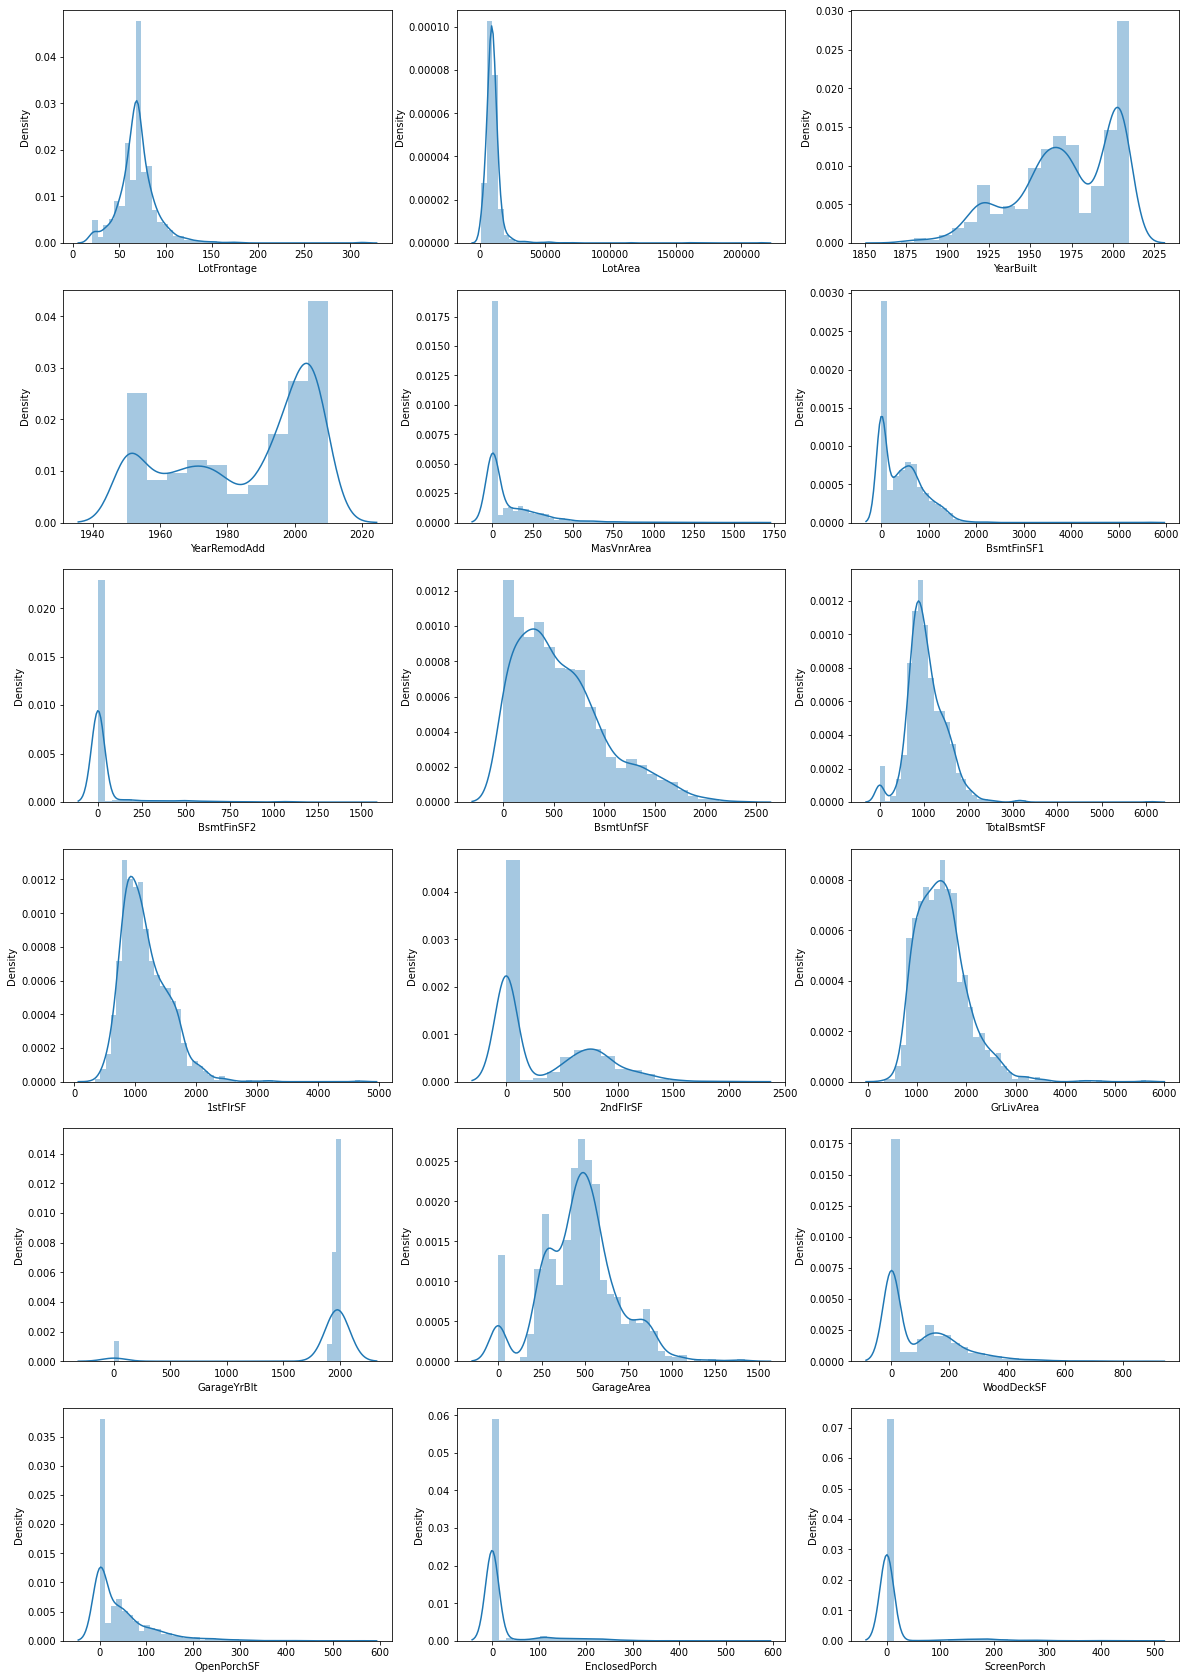

In [64]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,30))
for i in cont_feat:
    if c <= len(cont_feat):
        plt.subplot(a, b, c)
        sns.distplot(housing_df[i]);
        c = c + 1

plt.show()

##### Insights:

Except 'YearBuilt', 'GarageYrBlt', all features are right skewed

##### Discrete Variables of numerical features

In [65]:
discrete_features=[y for y in numeric_features_columns if len(housing_df[y].unique())<25]
print("Number of Discrete Variables features present : ",len(discrete_features),"\n")
print(discrete_features)

# Checking the continuos Variables column data
housing_df[discrete_features].head()

Number of Discrete Variables features present :  17 

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold']


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  YrSold  
0           0           2          0         0        0    2008  
1           1           2          0         0        0    2007  
2           1           2          0         0        0    2008  
3           1           3          0         0        0    2006  
4           1           3          0         0        0    2008

Plot for Discrete Values

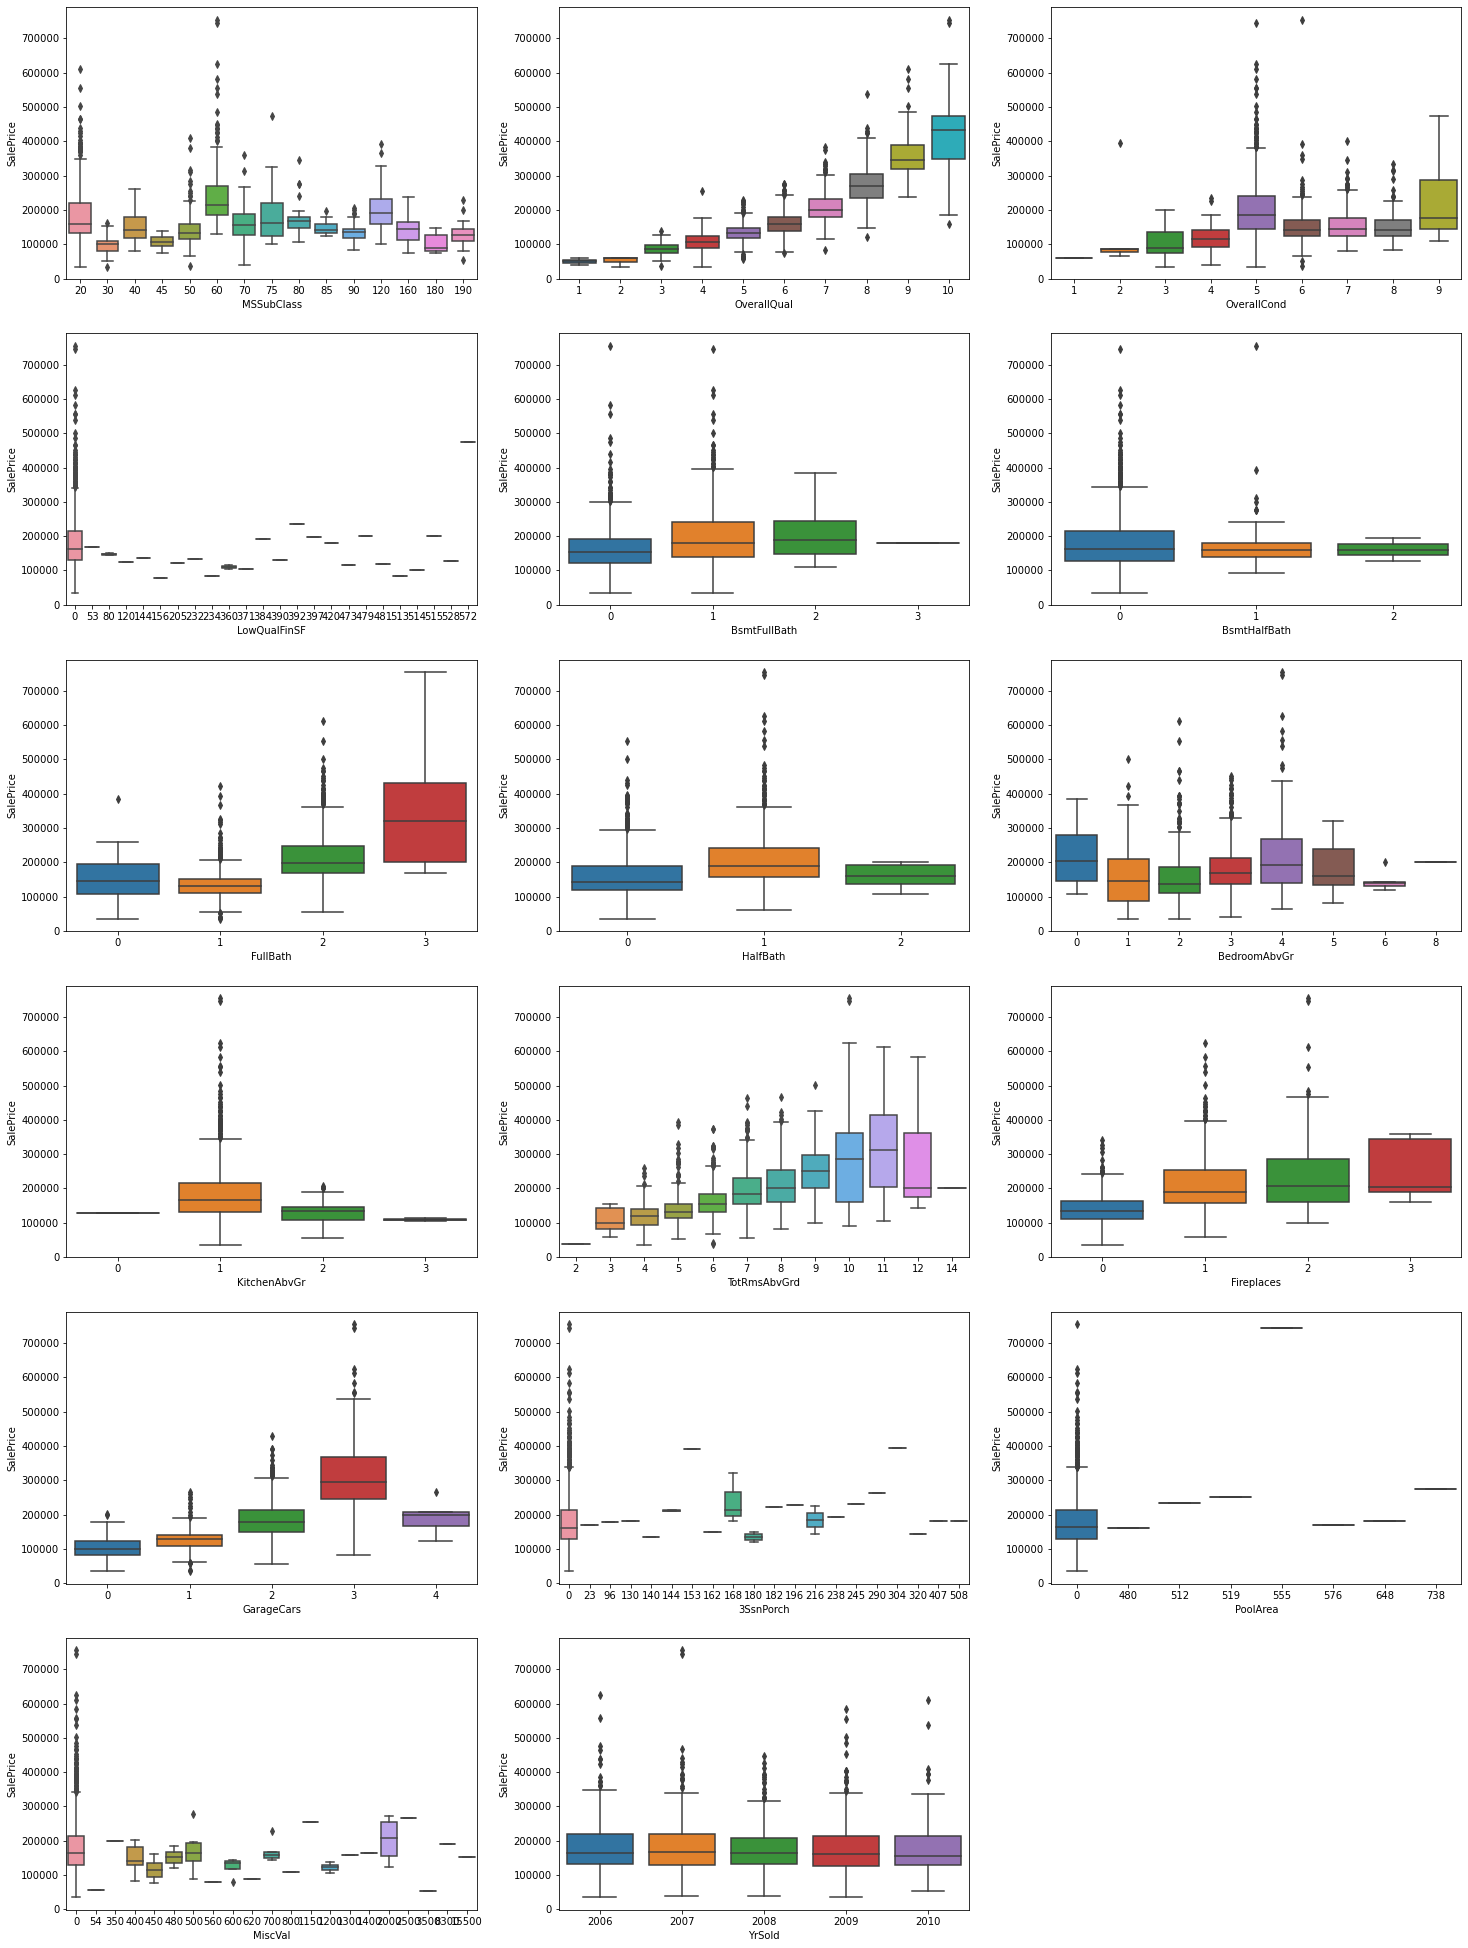

In [66]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(25,35))
for i in discrete_features:
    if c <= len(discrete_features):
        plt.subplot(a, b, c)
        plt.xlabel(i)
        sns.boxplot(x=housing_df[i], y=housing_df['SalePrice'])
        c = c + 1

plt.show()

##### Insights:

Features are having outliers

##### Categorical features

In [67]:
cat_feat=[x for x in categorical_features_columns]
print("Number of categorical features present : ",len(cat_feat),"\n")
print(cat_feat)

# Checking the categorical column data
housing_df[cat_feat].head()

Number of categorical features present :  43 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ        None     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y   None  None        None   
1          RFn         TA         TA          Y   None  None        None   
2          RFn         TA         TA          Y   None  None        None   
3          Unf         TA         TA          Y   None  None        None   
4          RFn         TA         TA          Y   None  None        None   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

Plot for categorical values

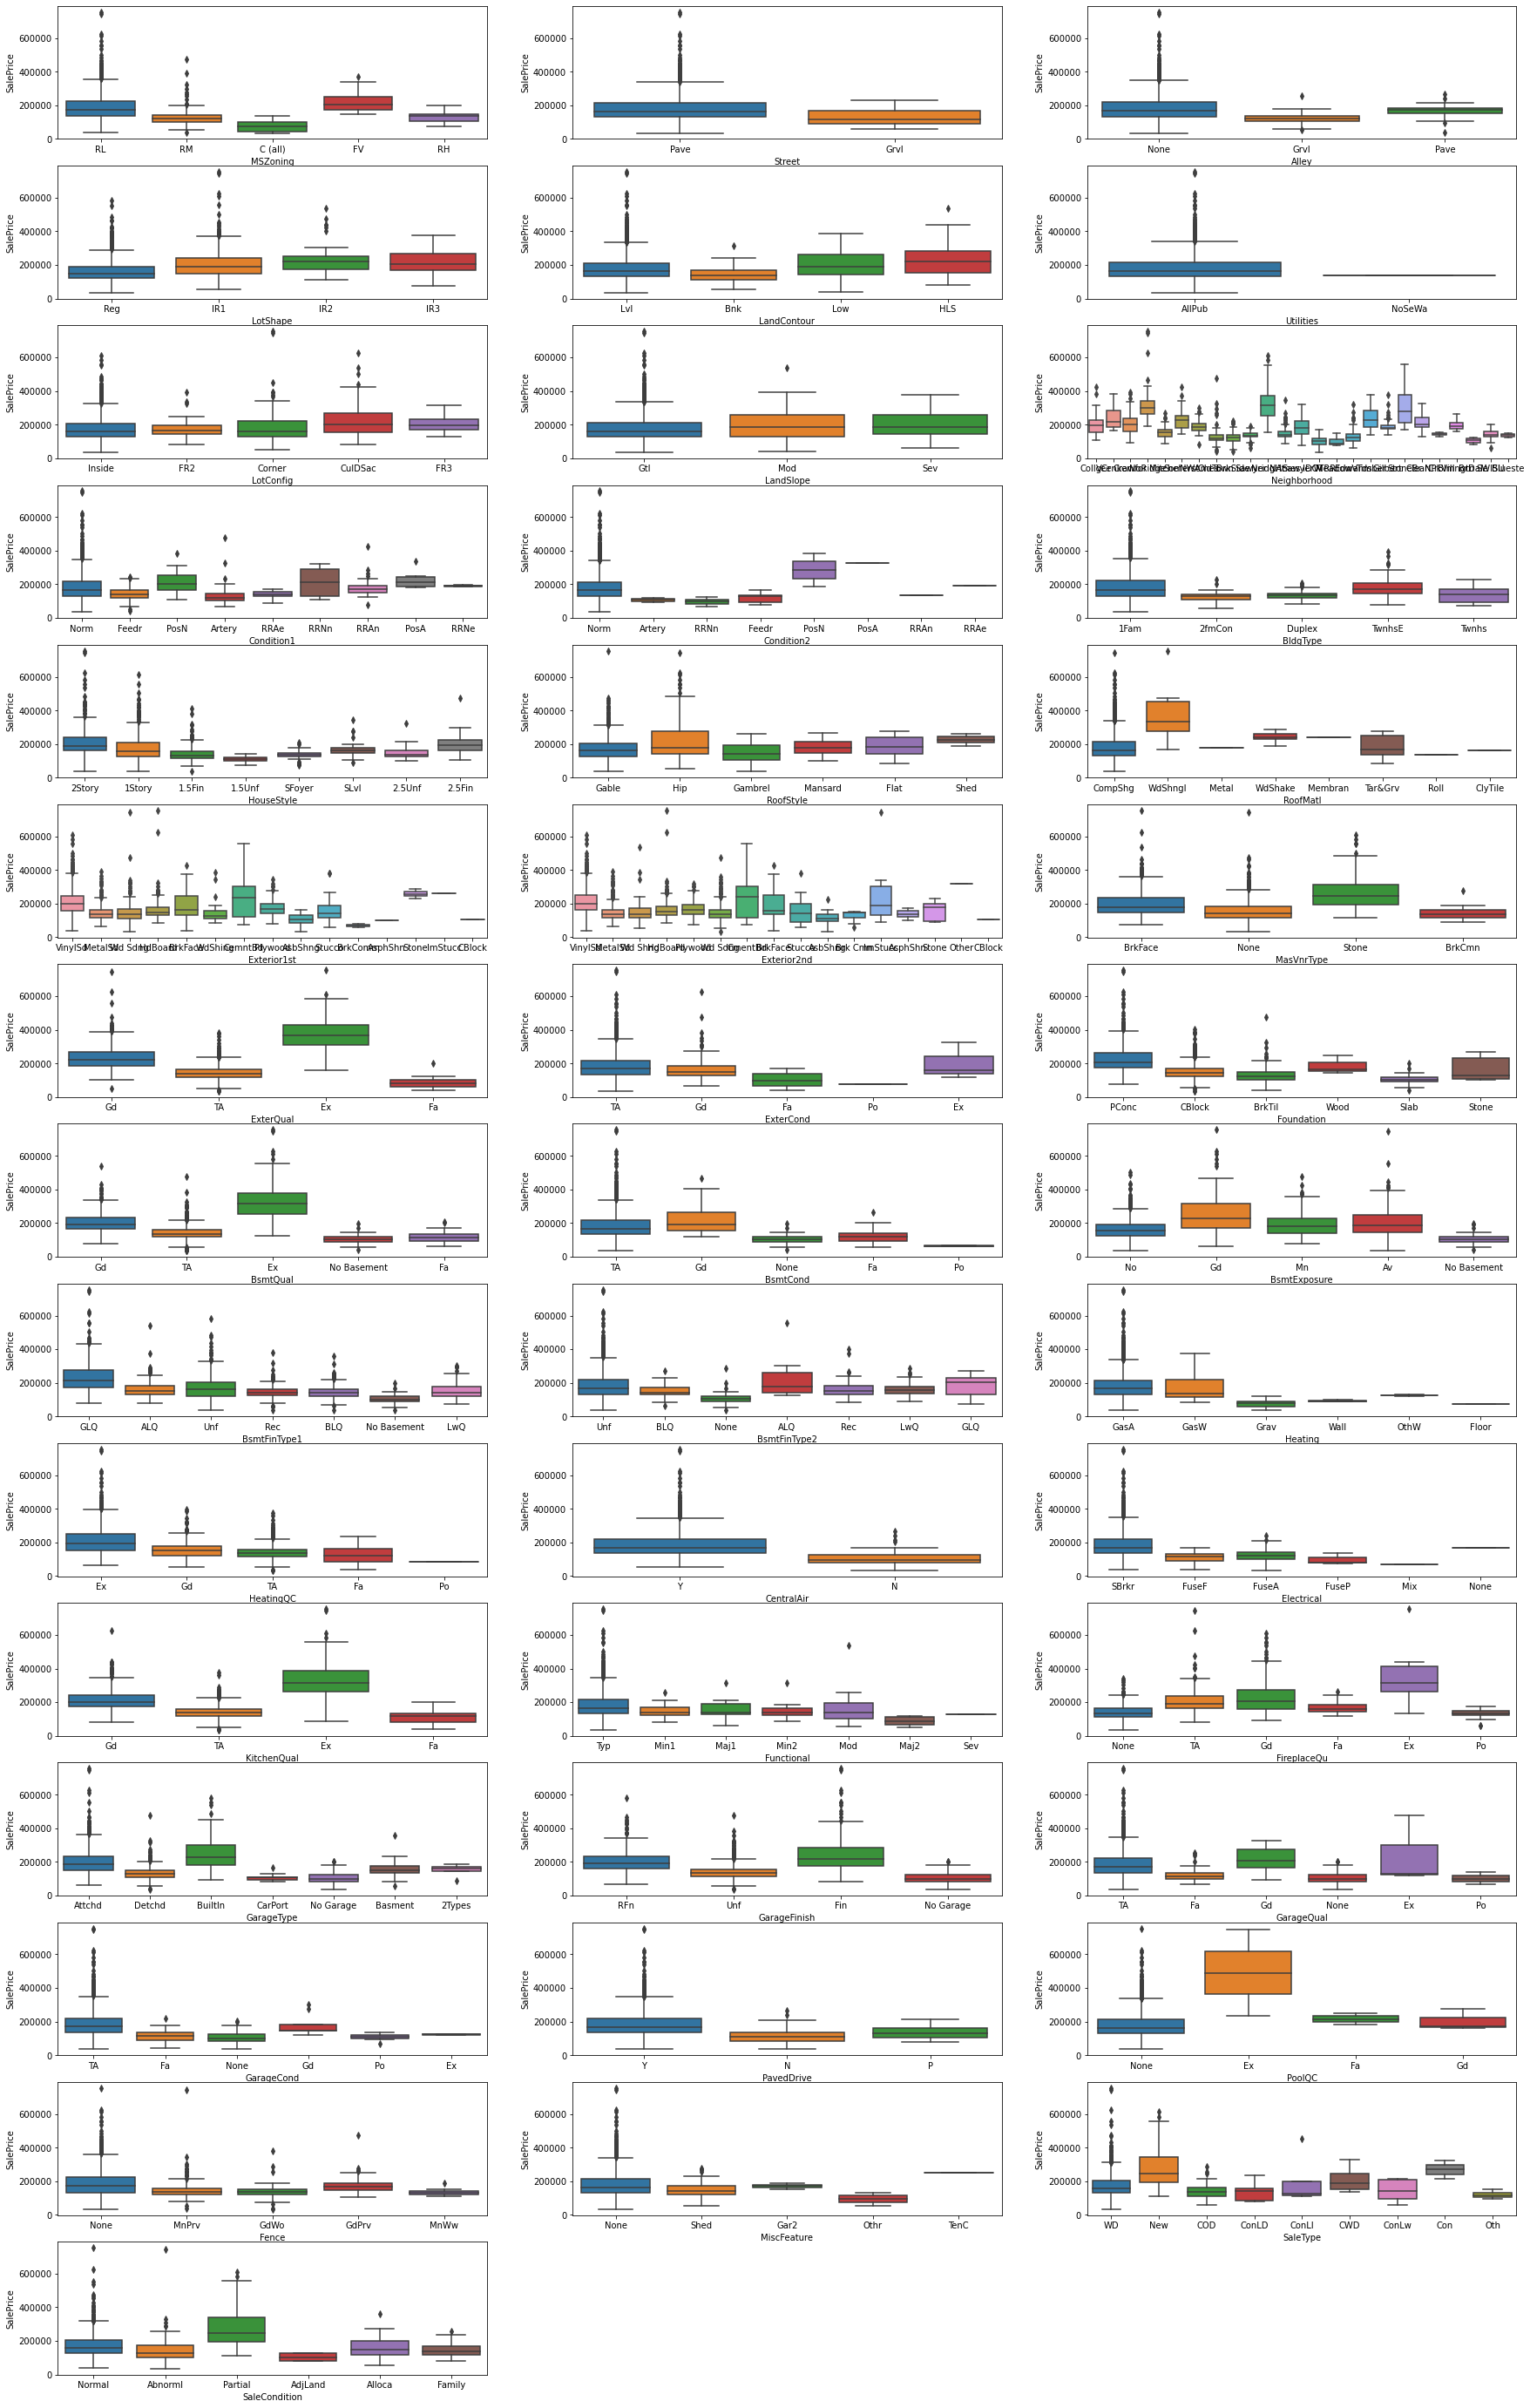

In [68]:
a = 15  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(30,50))
for i in cat_feat:
    if (c <= len(cat_feat)):
        plt.subplot(a, b, c)
        sns.boxplot(x=housing_df[i], y=housing_df['SalePrice'])
        plt.xlabel(i)
        plt.title
        c = c + 1
    
plt.show()

##### Insights:

Features are having outliers

### Data Preparation

####  Enabling label encoding for  Ordinal Categorical features 

In [69]:
def get_valueCountsOfFeature(df,feturename,sortIndex=False,sortValues=False):
    featurecount = df[feturename].value_counts().sort_index(ascending=sortIndex).sort_values(ascending=sortValues)
    featurecount_df = pd.DataFrame(featurecount).reset_index()
    featurecount_df.columns = ['unique_values', 'counts'] # change column names
    return featurecount_df

In [70]:
ordinal_Features = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                    'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual',
                    'GarageCond','PoolQC']

for feature in ordinal_Features:
    print(f'Value Count of :{feature}\n{get_valueCountsOfFeature(df=housing_df,feturename=feature,sortValues=True)}\n')

Value Count of :LotShape
  unique_values  counts
0           IR3      10
1           IR2      41
2           IR1     484
3           Reg     925

Value Count of :Utilities
  unique_values  counts
0        NoSeWa       1
1        AllPub    1459

Value Count of :LandSlope
  unique_values  counts
0           Sev      13
1           Mod      65
2           Gtl    1382

Value Count of :ExterQual
  unique_values  counts
0            Fa      14
1            Ex      52
2            Gd     488
3            TA     906

Value Count of :ExterCond
  unique_values  counts
0            Po       1
1            Ex       3
2            Fa      28
3            Gd     146
4            TA    1282

Value Count of :BsmtQual
  unique_values  counts
0            Fa      35
1   No Basement      37
2            Ex     121
3            Gd     618
4            TA     649

Value Count of :BsmtCond
  unique_values  counts
0            Po       2
1          None      37
2            Fa      45
3            Gd      65

#### Label Encoding

For PoolQC

In [71]:
# Value Count of :PoolQC
#   unique_values  counts
# 0            Fa       2
# 1            Ex       2
# 2            Gd       3
# 3          None    1453

PoolQC_map = {'Ex':1, 'Gd':2, 'Fa':3, "None":4}
housing_df['PoolQC'] = housing_df['PoolQC'].map(PoolQC_map)
housing_df['PoolQC'] = housing_df['PoolQC'].astype(int)

For GarageCond

In [72]:
# Value Count of :GarageCond
#   unique_values  counts
# 0            Ex       2
# 1            Po       7
# 2            Gd       9
# 3            Fa      35
# 4          None      81
# 5            TA    1326
GarageCond_map = {'Ex':1, 'Gd':2, 'Ta':3, 'Fa':4, 'Po':5, "None":6}
housing_df['GarageCond'] = housing_df['GarageCond'].map(GarageCond_map)

For GarageQual

In [73]:
# Value Count of :GarageQual
#   unique_values  counts
# 0            Po       3
# 1            Ex       3
# 2            Gd      14
# 3            Fa      48
# 4          None      81
# 5            TA    1311

GarageQual_map = {'Ex':1, 'Gd':2, 'Ta':3, 'Fa':4, 'Po':5, "None":6}
housing_df['GarageQual'] = housing_df['GarageQual'].map(GarageQual_map)

For FireplaceQu

In [74]:
# Value Count of :FireplaceQu
#   unique_values  counts
# 0            Po      20
# 1            Ex      24
# 2            Fa      33
# 3            TA     313
# 4            Gd     380
# 5          None     690

FireplaceQu_map = {'Ex':1, 'Gd':2, 'Ta':3, 'Fa':4, 'Po':5, "None":6}
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map(FireplaceQu_map)

For Functional

In [75]:
# Value Count of :Functional
#   unique_values  counts
# 0           Sev       1
# 1          Maj2       5
# 2          Maj1      14
# 3           Mod      15
# 4          Min1      31
# 5          Min2      34
# 6           Typ    1360

Functional_map = {'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, "Maj2":6, "Sev":7}
housing_df['Functional'] = housing_df['Functional'].map(Functional_map)
housing_df['Functional'] = housing_df['Functional'].astype(int)

For KitchenQual

In [76]:
# Value Count of :KitchenQual
#   unique_values  counts
# 0            Fa      39
# 1            Ex     100
# 2            Gd     586
# 3            TA     735

KitchenQual_map = {'Ex':1, 'Gd':2, 'Ta':3, "Fa":4, 'Po':5}
housing_df['KitchenQual'] = housing_df['KitchenQual'].map(KitchenQual_map)

For HeatingQC

In [77]:
# Value Count of :HeatingQC
#   unique_values  counts
# 0            Po       1
# 1            Fa      49
# 2            Gd     241
# 3            TA     428
# 4            Ex     741

HeatingQC_map = {'Ex':1, 'Gd':2, 'Ta':3, "Fa":4, 'Po':5}
housing_df['HeatingQC'] = housing_df['HeatingQC'].map(HeatingQC_map)

For BsmtFinType2

In [78]:
# Value Count of :BsmtFinType2
#   unique_values  counts 
# 0           GLQ      14
# 1           ALQ      19
# 2           BLQ      33
# 3          None      38
# 4           LwQ      46
# 5           Rec      54
# 6           Unf    1256

BsmtFinType2_map = {'GLQ':1, 'ALQ':2, 'BLQ':3, "Rec":4, 'LwQ':5, 'Unf':6, "None":7}
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map(BsmtFinType2_map)
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].astype(int)

For BsmtFinType1

In [79]:
# Value Count of :BsmtFinType1
#   unique_values  counts
# 0   No Basement      37
# 1           LwQ      74
# 2           Rec     133
# 3           BLQ     148
# 4           ALQ     220
# 5           GLQ     418
# 6           Unf     430

BsmtFinType1_map = {'GLQ':1, 'ALQ':2, 'BLQ':3, "Rec":4, 'LwQ':5, 'BLQ':6, "No Basement":7}
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map(BsmtFinType1_map)

For BsmtExposure

In [80]:
# Value Count of :BsmtExposure
#   unique_values  counts
# 0   No Basement      38
# 1            Mn     114
# 2            Gd     134
# 3            Av     221
# 4            No     953

BsmtExposure_map = {'Gd':1, 'Av':2, 'Mn':3, "No":4, "No Basement":5}
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map(BsmtExposure_map)
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].astype(int)

For BsmtCond

In [81]:
# Value Count of :BsmtCond
#   unique_values  counts
# 0            Po       2
# 1          None      37
# 2            Fa      45
# 3            Gd      65
# 4            TA    1311

BsmtCond_map = {'Gd':1, 'Ex':2, 'Fa':3, 'Po':4, "None":5}
housing_df['BsmtCond'] = housing_df['BsmtCond'].map(BsmtCond_map)

For BsmtQual

In [82]:
# Value Count of :BsmtQual
#   unique_values  counts
# 0            Fa      35
# 1   No Basement      37
# 2            Ex     121
# 3            Gd     618
# 4            TA     649

BsmtQual_map =  {'Ex':1, 'Gd':2, 'Ta':3, "Fa":4, "No Basement":5}
housing_df['BsmtQual'] = housing_df['BsmtQual'].map(BsmtQual_map)

For ExterCond

In [83]:
# Value Count of :ExterCond
#   unique_values  counts
# 0            Po       1
# 1            Ex       3
# 2            Fa      28
# 3            Gd     146
# 4            TA    1282

ExterCond_map =  {'Ex':1, 'Gd':2, 'Ta':3, "Fa":4, 'Po':5}
housing_df['ExterCond'] = housing_df['ExterCond'].map(ExterCond_map)

For ExterQual

In [84]:
# Value Count of :ExterQual
#   unique_values  counts
# 0            Fa      14
# 1            Ex      52
# 2            Gd     488
# 3            TA     906

ExterQual_map = {'Ex':1, 'Gd':2, 'Ta':3, "Fa":4}
housing_df['ExterQual'] = housing_df['ExterQual'].map(ExterQual_map)

For LandSlope

In [85]:
# Value Count of :LandSlope
#   unique_values  counts
# 0           Sev      13
# 1           Mod      65
# 2           Gtl    1382

LandSlope_map = {'Sev':1, 'Mod':2, 'Gtl':3}
housing_df['LandSlope'] = housing_df['LandSlope'].map(LandSlope_map)
housing_df['LandSlope'] = housing_df['LandSlope'].astype(int)

For Utilities

In [86]:
# Value Count of :Utilities
#   unique_values  counts
# 0        NoSeWa       1
# 1        AllPub    1459

Utilities_map = {'AllPub':1, 'NoSeWa':2}
housing_df['Utilities'] = housing_df['Utilities'].map(Utilities_map)
housing_df['Utilities'] = housing_df['Utilities'].astype(int)

For LotShape

In [87]:
# Value Count of :LotShape
#   unique_values  counts
# 0           IR3      10
# 1           IR2      41
# 2           IR1     484
# 3           Reg     925

LotShape_map = {'Reg':1, 'IR1':2, 'IR2':3, "IR3":4}
housing_df['LotShape'] = housing_df['LotShape'].map(LotShape_map)
housing_df['LotShape'] = housing_df['LotShape'].astype(int)

In [88]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0     8450   Pave  None         1   
1          20       RL         80.0     9600   Pave  None         1   
2          60       RL         68.0    11250   Pave  None         2   
3          70       RL         60.0     9550   Pave  None         2   
4          60       RL         84.0    14260   Pave  None         2   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside          3      CollgCr       Norm   
1         Lvl          1       FR2          3      Veenker      Feedr   
2         Lvl          1    Inside          3      CollgCr       Norm   
3         Lvl          1    Corner          3      Crawfor       Norm   
4         Lvl          1       FR2          3      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0        2.0        NaN      PConc       2.0       NaN   
1         0.0        NaN        NaN     CBlock       2.0       NaN   
2       162.0        2.0        NaN      PConc       2.0       NaN   
3         0.0        NaN        NaN     BrkTil       NaN       1.0   
4       350.0        2.0        NaN      PConc       2.0       NaN   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4           1.0         706             6           0   
1             1           2.0         978             6           0   
2             3           1.0         486             6           0   
3             4           2.0         216             6           0   
4             2           1.0         655             6           0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        1.0          Y      SBrkr       856   
1        284         1262    GasA        1.0          Y      SBrkr      1262   
2        434          920    GasA        1.0          Y      SBrkr       920   
3        540          756    GasA        2.0          Y      SBrkr       961   
4        490         1145    GasA        1.0          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1          2.0             8   
1         0             3             1          NaN             6   
2         1             3             1          2.0             6   
3         0             3             1          2.0             7   
4         1             4             1          2.0             9   

   Functional  Fireplaces  FireplaceQu G

In [89]:
missingcols_lblDecode_df = get_MissingValues(housing_df)
missingcols_lblDecode_df

10 features have missing value


colname  percentage featureDtype
9    GarageCond       90.82      float64
3      BsmtCond       89.79      float64
8    GarageQual       89.79      float64
1     ExterCond       87.81      float64
0     ExterQual       62.05      float64
6   KitchenQual       50.34      float64
2      BsmtQual       44.45      float64
4  BsmtFinType1       29.45      float64
5     HeatingQC       29.32      float64
7   FireplaceQu       21.44      float64

In [90]:
missing_cols = list(missingcols_lblDecode_df['colname']) 
housing_df.drop(missing_cols,inplace=True,axis=1)

In [91]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

After providing Label Encoding Using category codes approach, the categorical columns got converted to int8 dtype

#### Bucketing the labels for categorical features

In [92]:
cat_col_features_df = get_colsofType(df=housing_df, featureType=['object'])
cat_col_features = cat_col_features_df.columns.tolist()
print(f'Categorical Features : \n{cat_col_features}\n\n')
cat_col_features_df.head()

Categorical Features : 
['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']




MSZoning Street Alley LandContour LotConfig Neighborhood Condition1  \
0       RL   Pave  None         Lvl    Inside      CollgCr       Norm   
1       RL   Pave  None         Lvl       FR2      Veenker      Feedr   
2       RL   Pave  None         Lvl    Inside      CollgCr       Norm   
3       RL   Pave  None         Lvl    Corner      Crawfor       Norm   
4       RL   Pave  None         Lvl       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
1       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType Foundation Heating CentralAir Electrical GarageType GarageFinish  \
0    BrkFace      PConc    GasA          Y      SBrkr     Attchd          RFn   
1       None     CBlock    GasA          Y      SBrkr     Attchd          RFn   
2    BrkFace      PConc    GasA          Y      SBrkr     Attchd          RFn   
3       None     BrkTil    GasA          Y      SBrkr     Detchd          Unf   
4    BrkFace      PConc    GasA          Y      SBrkr     Attchd          RFn   

  PavedDrive Fence MiscFeature SaleType SaleCondition  
0          Y  None        None       WD        Normal  
1          Y  None        None       WD        Normal  
2          Y  None        None       WD        Normal  
3          Y  None        None       WD       Abnorml  
4          Y  None        None       WD        Normal

In [93]:
for feature in cat_col_features_df:
    print(f'Value Count of :{feature}\n{get_valueCountsOfFeature(df=housing_df,feturename=feature,sortValues=True)}\n')

Value Count of :MSZoning
  unique_values  counts
0       C (all)      10
1            RH      16
2            FV      65
3            RM     218
4            RL    1151

Value Count of :Street
  unique_values  counts
0          Grvl       6
1          Pave    1454

Value Count of :Alley
  unique_values  counts
0          Pave      41
1          Grvl      50
2          None    1369

Value Count of :LandContour
  unique_values  counts
0           Low      36
1           HLS      50
2           Bnk      63
3           Lvl    1311

Value Count of :LotConfig
  unique_values  counts
0           FR3       4
1           FR2      47
2       CulDSac      94
3        Corner     263
4        Inside    1052

Value Count of :Neighborhood
   unique_values  counts
0        Blueste       2
1        NPkVill       9
2        Veenker      11
3         BrDale      16
4        MeadowV      17
5        Blmngtn      17
6          SWISU      25
7        StoneBr      25
8        ClearCr      28
9         IDOTRR

#### Value shrinking method by Bucketing where value_count is more

Grouping the values to 'Other' as the value_counts is more for the below features

In [94]:
cat_cols_for_bucketing = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

##### Finding number of houses in the neighborhood.

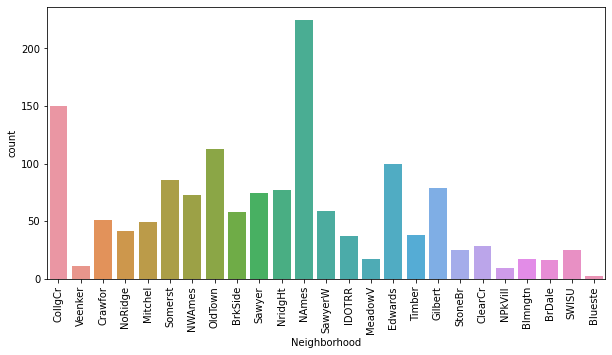

In [95]:
plt.figure(figsize = [10,5])
sns.countplot(data = housing_df,x = 'Neighborhood')
plt.xticks(rotation=90)
plt.show();

#### Insights: 
Looks like more number of houses are present in the North Ames (NAmes) neighborhood.

In [96]:
# Bucketing Neighborhood
housing_df.Neighborhood.replace(['Sawyer','NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR',
                                 'ClearCr','StoneBr','SWISU','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste','NridgHt'],
                                'Other', inplace = True)
housing_df['Neighborhood'].value_counts(normalize=True, sort= False, ascending=False)

CollgCr    0.102740
Other      0.484247
Somerst    0.058904
OldTown    0.077397
NAmes      0.154110
Edwards    0.068493
Gilbert    0.054110
Name: Neighborhood, dtype: float64

##### Exterior covering on house

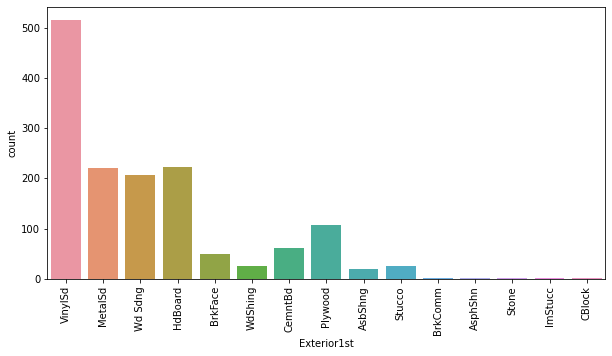

In [97]:
plt.figure(figsize = [10,5])
sns.countplot(data = housing_df,x = 'Exterior1st')
plt.xticks(rotation=90)
plt.show();

In [98]:
housing_df.Exterior1st.replace(['Plywood','CemntBd','BrkFace','WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','CBlock','ImStucc'],
                                'Other', inplace = True)
housing_df['Exterior1st'].value_counts(normalize=True, sort= False, ascending=False)

VinylSd    0.352740
MetalSd    0.150685
Wd Sdng    0.141096
HdBoard    0.152055
Other      0.203425
Name: Exterior1st, dtype: float64

##### Exterior covering on house (if more than one material)

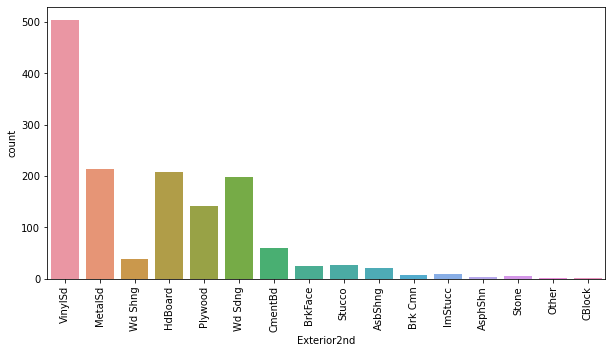

In [99]:
plt.figure(figsize = [10,5])
sns.countplot(data = housing_df,x = 'Exterior2nd')
plt.xticks(rotation=90)
plt.show();

#### Insights: 
Looks like more number of Vinyl Siding (vinylsd) is opted w.r.t. both Exterior1st & Exterior2nd.

In [100]:
housing_df.Exterior2nd.replace(['Plywood', 'CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'],
                                'Other', inplace = True)
housing_df['Exterior2nd'].value_counts(normalize=True, sort= False, ascending=False)

VinylSd    0.345205
MetalSd    0.146575
Other      0.231507
HdBoard    0.141781
Wd Sdng    0.134932
Name: Exterior2nd, dtype: float64

### New feature derived

Creating a derived varibale House_Age from Yearbuilt and dropping yearbuilt.

In [101]:
housing_df['House_Age'] = housing_df.YrSold - housing_df.YearBuilt
housing_df.drop('YearBuilt',axis=1,inplace=True)
housing_df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0     8450   Pave  None         1   
1          20       RL         80.0     9600   Pave  None         1   
2          60       RL         68.0    11250   Pave  None         2   
3          70       RL         60.0     9550   Pave  None         2   
4          60       RL         84.0    14260   Pave  None         2   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside          3      CollgCr       Norm   
1         Lvl          1       FR2          3        Other      Feedr   
2         Lvl          1    Inside          3      CollgCr       Norm   
3         Lvl          1    Corner          3        Other       Norm   
4         Lvl          1       FR2          3        Other       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story            7            5          2003   
1       Norm     1Fam     1Story            6            8          1976   
2       Norm     1Fam     2Story            7            5          2002   
3       Norm     1Fam     2Story            7            5          1970   
4       Norm     1Fam     2Story            8            5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng       Other       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   

  Foundation  BsmtExposure  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0      PConc             4         706             6           0        150   
1     CBlock             1         978             6           0        284   
2      PConc             3         486             6           0        434   
3     BrkTil             4         216             6           0        540   
4      PConc             2         655             6           0        490   

   TotalBsmtSF Heating CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          Y      SBrkr       856       854   
1         1262    GasA          Y      SBrkr      1262         0   
2          920    GasA          Y      SBrkr       920       866   
3          756    GasA          Y      SBrkr       961       756   
4         1145    GasA          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Functional  Fireplaces  \
0             3             1             8           1           0   
1             3             1             6           1           1   
2             3             1             6           1           1   
3             3             1             7           1           1   
4             4             1             9           1           1   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea PavedDrive  \
0     Attchd         2003          RFn           2         548          Y   
1     Attchd         1976          RFn           2         460          Y   
2     Attchd         2001          RFn           2         608          Y   
3     Detchd         1998          Unf           3         642          Y   
4     Attchd         2000          RFn           3         836          Y   

   WoodDec

Creating a derived varibale Age_Remodel from YearRemodAdd and dropping YearRemodAdd.

In [102]:
housing_df['Age_Remodel'] = housing_df.YrSold - housing_df.YearRemodAdd
housing_df.drop('YearRemodAdd',axis=1,inplace=True)
housing_df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0     8450   Pave  None         1   
1          20       RL         80.0     9600   Pave  None         1   
2          60       RL         68.0    11250   Pave  None         2   
3          70       RL         60.0     9550   Pave  None         2   
4          60       RL         84.0    14260   Pave  None         2   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside          3      CollgCr       Norm   
1         Lvl          1       FR2          3        Other      Feedr   
2         Lvl          1    Inside          3      CollgCr       Norm   
3         Lvl          1    Corner          3        Other       Norm   
4         Lvl          1       FR2          3        Other       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  BsmtExposure  \
0     VinylSd     VinylSd    BrkFace       196.0      PConc             4   
1     MetalSd     MetalSd       None         0.0     CBlock             1   
2     VinylSd     VinylSd    BrkFace       162.0      PConc             3   
3     Wd Sdng       Other       None         0.0     BrkTil             4   
4     VinylSd     VinylSd    BrkFace       350.0      PConc             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706             6           0        150          856    GasA   
1         978             6           0        284         1262    GasA   
2         486             6           0        434          920    GasA   
3         216             6           0        540          756    GasA   
4         655             6           0        490         1145    GasA   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  \
0             8           1           0     Attchd         2003          RFn   
1             6           1           1     Attchd         1976          RFn   
2             6           1           1     Attchd         2001          RFn   
3             7           1           1     Detchd         1998          Unf   
4             9           1           1     Attchd         2000          RFn   

   GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           2         548          Y           0           61              0   
1           2         460          Y         298            0              0   
2           2         608          Y           0           42              0   
3           3  

Creating a derived varibale AgeOfGarage from GarageYrBlt and dropping GarageYrBlt.

In [103]:
# GarageYrBlt: Year garage was built : create a variabe "AgeOfGarage"
# step 1 - Derive age from given years
# step 2 - if no years, use age=="age of house" and if still there are zeros, use age=="age since remodelled",
# in everything else, put the age==0

def getNewFeature_AgeOfGarage(df):
    for valindex in  range(len(df.GarageYrBlt)):        
        if int(df.GarageYrBlt[valindex]) == 0:            
            houseAge = housing_df.House_Age[valindex]
            if int(houseAge) != 0:
                df['AgeOfGarage'] = houseAge
            else: 
                houseremodelled = housing_df.Age_Remodel[valindex]                
                if int(houseremodelled) != 0:
                    df['AgeOfGarage'] = houseremodelled
                else:
                    df['AgeOfGarage'] = 0
        else:
            df['AgeOfGarage'] = df.YrSold - df.GarageYrBlt
            

getNewFeature_AgeOfGarage(housing_df)
housing_df.drop(['GarageYrBlt','YrSold'],axis=1,inplace=True)
housing_df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0     8450   Pave  None         1   
1          20       RL         80.0     9600   Pave  None         1   
2          60       RL         68.0    11250   Pave  None         2   
3          70       RL         60.0     9550   Pave  None         2   
4          60       RL         84.0    14260   Pave  None         2   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside          3      CollgCr       Norm   
1         Lvl          1       FR2          3        Other      Feedr   
2         Lvl          1    Inside          3      CollgCr       Norm   
3         Lvl          1    Corner          3        Other       Norm   
4         Lvl          1       FR2          3        Other       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation  BsmtExposure  \
0     VinylSd     VinylSd    BrkFace       196.0      PConc             4   
1     MetalSd     MetalSd       None         0.0     CBlock             1   
2     VinylSd     VinylSd    BrkFace       162.0      PConc             3   
3     Wd Sdng       Other       None         0.0     BrkTil             4   
4     VinylSd     VinylSd    BrkFace       350.0      PConc             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706             6           0        150          856    GasA   
1         978             6           0        284         1262    GasA   
2         486             6           0        434          920    GasA   
3         216             6           0        540          756    GasA   
4         655             6           0        490         1145    GasA   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Functional  Fireplaces GarageType GarageFinish  GarageCars  \
0             8           1           0     Attchd          RFn           2   
1             6           1           1     Attchd          RFn           2   
2             6           1           1     Attchd          RFn           2   
3             7           1           1     Detchd          Unf           3   
4             9           1           1     Attchd          RFn           3   

   GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         548          Y           0           61              0          0   
1         460          Y         298            0              0          0   
2         608          Y           0           42              0          0   
3         642          Y 

Checking missing value

In [104]:
get_MissingValues(housing_df)

'No missingValues'

### Outlier Treatment

In [105]:
# Getting the statistical insight for the dataset
test = housing_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1])
test.shape

(15, 42)

In [106]:
df_numerical=get_colsofType(df=housing_df, featureType=['float64','int64'])
df_numerical.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  House_Age  Age_Remodel  AgeOfGarage  
0         0        0     208500          5            5            5  
1         0        0     181500         31           31           31  
2         0        0     223500          7            6            7  
3         0        0     140000         91           36            8  
4         0        0     250000          8            8            8

In [107]:
numeric_features_columns = df_numerical.columns.to_list()
numeric_features_columns.remove('SalePrice')
len(numeric_features_columns)

34

###### Processing Outlier Treatment using IQR

In [108]:
df_numerical = housing_df[numeric_features_columns]
features = df_numerical.columns.to_list()

for feature in numeric_features_columns:
    
    q1 = df_numerical[feature].quantile(0.25)
    q3 = df_numerical[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    housing_df[feature][housing_df[feature] < lower_bound] = lower_bound
    housing_df[feature][housing_df[feature] > upper_bound] = upper_bound
    
housing_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1])

MSSubClass  LotFrontage       LotArea     LotShape    Utilities  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     55.085616    69.090411   9647.388014     1.408219     1.000685   
std      37.508183    17.231909   3594.356399     0.582296     0.026171   
min      20.000000    31.500000   1481.500000     1.000000     1.000000   
10%      20.000000    49.000000   5000.000000     1.000000     1.000000   
25%      20.000000    60.000000   7553.500000     1.000000     1.000000   
50%      50.000000    69.000000   9478.500000     1.000000     1.000000   
75%      70.000000    79.000000  11601.500000     2.000000     1.000000   
85%      90.000000    85.000000  13161.100000     2.000000     1.000000   
90%     120.000000    92.000000  14381.700000     2.000000     1.000000   
95%     145.000000   104.000000  17401.150000     2.000000     1.000000   
98%     145.000000   107.500000  17673.500000     3.000000     1.000000   
99%     145.000000   107.500000  17673.500000     3.000000     1.000000   
100%    145.000000   107.500000  17673.500000     4.000000     2.000000   
max     145.000000   107.500000  17673.500000     4.000000     2.000000   

         LandSlope  OverallQual  OverallCond   MasVnrArea  BsmtExposure  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      2.937671     6.100685     5.543493    91.139041      3.369863   
std       0.276232     1.378430     0.963696   135.606956      1.067391   
min       1.000000     2.000000     3.500000     0.000000      1.000000   
10%       3.000000     5.000000     5.000000     0.000000      2.000000   
25%       3.000000     5.000000     5.000000     0.000000      3.000000   
50%       3.000000     6.000000     5.000000     0.000000      4.000000   
75%       3.000000     7.000000     6.000000   168.000000      4.000000   
85%       3.000000     8.000000     7.000000   261.150000      4.000000   
90%       3.000000     8.000000     7.000000   335.000000      4.000000   
95%       3.000000     8.000000     7.500000   420.000000      4.000000   
98%       3.000000     9.000000     7.500000   420.000000      5.000000   
99%       3.000000    10.000000     7.500000   420.000000      5.000000   
100%      3.000000    10.000000     7.500000   420.000000      5.000000   
max       3.000000    10.000000     7.500000   420.000000      5.000000   

        BsmtFinSF1  BsmtFinType2  BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000   1460.000000      1460.0  1460.000000  1460.000000   
mean    439.997517      5.752740         0.0   563.777740  1050.254795   
std     433.219435      0.892332         0.0   431.710214   397.937878   
min       0.000000      1.000000         0.0     0.000000    42.000000   
10%       0.000000      5.000000         0.0    74.900000   636.900000   
25%       0.000000      6.000000         0.0   223.000000   795.750000   
50%     383.500000      6.000000         0.0   477.500000   991.500000   
75%     712.250000      6.000000         0.0   808.000000  1298.250000   
85%     929.450000      6.000000         0.0  1010.300000  1485.150000   
90%    1065.500000      6.000000         0.0  1232.000000  1602.200000   
95%    1274.000000      6.000000         0.0  1468.000000  1753.000000   
98%    1442.640000      7.000000         0.0  1678.200000  2001.640000   
99%    1572.410000      7.000000         0.0  1685.500000  2052.000000   
100%   1780.625000      7.000000         0.0  1685.500000  2052.000000   
max    1780.625000      7.000000         0.0  1685.500000  2052.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000        1460.0  1460.000000   1460.000000   
mean   1157.018151   346.789041           0.0  1503.735873      0.425000   
std     362.583002   435.791621           0.0   481.375641      0.517373   
min     334.000000     0.000000           0.0   334.000000      0.000000   
10%     756.900000     0.000000          

Dropping the columns where values of all percentiles is 0

In [109]:
# All percentiles 0 : 'MiscVal', 'PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF',
# 'BsmtHalfBath','KitchenAbvGr'
#

cols_to_drop = ['MiscVal', 'PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF','BsmtHalfBath','KitchenAbvGr']
housing_df.drop(cols_to_drop,inplace=True,axis=1)

##### Creating Dummy variables for categorical values - One hot encoding

In [110]:
# outliers = housing_df[housing_df['outlier'] == 'Yes'] # filter for outliers
# outliers

In [111]:
housing_df = pd.get_dummies(data=housing_df, columns=cat_col_features, drop_first=True)
housing_df.head(5)

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         1          1          3   
1          20         80.0   9600.0         1          1          3   
2          60         68.0  11250.0         2          1          3   
3          70         60.0   9550.0         2          1          3   
4          60         84.0  14260.0         2          1          3   

   OverallQual  OverallCond  MasVnrArea  BsmtExposure  BsmtFinSF1  \
0            7          5.0       196.0             4       706.0   
1            6          7.5         0.0             1       978.0   
2            7          5.0       162.0             3       486.0   
3            7          5.0         0.0             4       216.0   
4            8          5.0       350.0             2       655.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0             6           0      150.0          856     856.0       854   
1             6           0      284.0         1262    1262.0         0   
2             6           0      434.0          920     920.0       866   
3             6           0      540.0          756     961.0       756   
4             6           0      490.0         1145    1145.0      1053   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0     1710.0           1.0         2         1           3.0             8   
1     1262.0           0.0         2         0           3.0             6   
2     1786.0           1.0         2         1           3.0             6   
3     1717.0           1.0         1         0           3.0             7   
4     2198.0           1.0         2         1           4.0             9   

   Functional  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           1         0.0         2.0       548.0           0           61   
1           1         1.0         2.0       460.0         298            0   
2           1         1.0         2.0       608.0           0           42   
3           1         1.0         3.0       642.0           0           35   
4           1         1.0         3.0       836.0         192           84   

   PoolQC  SalePrice  House_Age  Age_Remodel  AgeOfGarage  MSZoning_FV  \
0       4     208500          5            5          5.0            0   
1       4     181500         31           31         31.0            0   
2       4     223500          7            6          7.0            0   
3       4     140000         91           36          8.0            0   
4       4     250000          8            8          8.0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0            0            1            0            1           1           0   
1            0            1            0            1           1           0   
2            0            1            0            1           1           0   
3            0            1            0            1           1           0   
4            0            1            0            1           1           0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Edwards  \
0              0              0                 1                     0   
1              1              0                 0                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
4             

In [112]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 151 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int32(7), int64(13), uint8(117)
memory usage: 514.8 KB


In [113]:
# Determine the percentage of data retained
print(f'housing_df shape : {housing_df.shape}')
retained_data = round(100*(len(housing_df)/housing_df.shape[0]),2)
print(f'retained_data : {retained_data} %')

housing_df shape : (1460, 151)
retained_data : 100.0 %


In [114]:
df_numerical=get_colsofType(df=housing_df, featureType=['float64','int64'])
numeric_cols = df_numerical.columns.to_list()
print(numeric_cols)
len(numeric_cols)
numeric_cols.remove('BsmtFinSF2')

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'House_Age', 'Age_Remodel', 'AgeOfGarage']


Plotting the heatmap only for numerical values

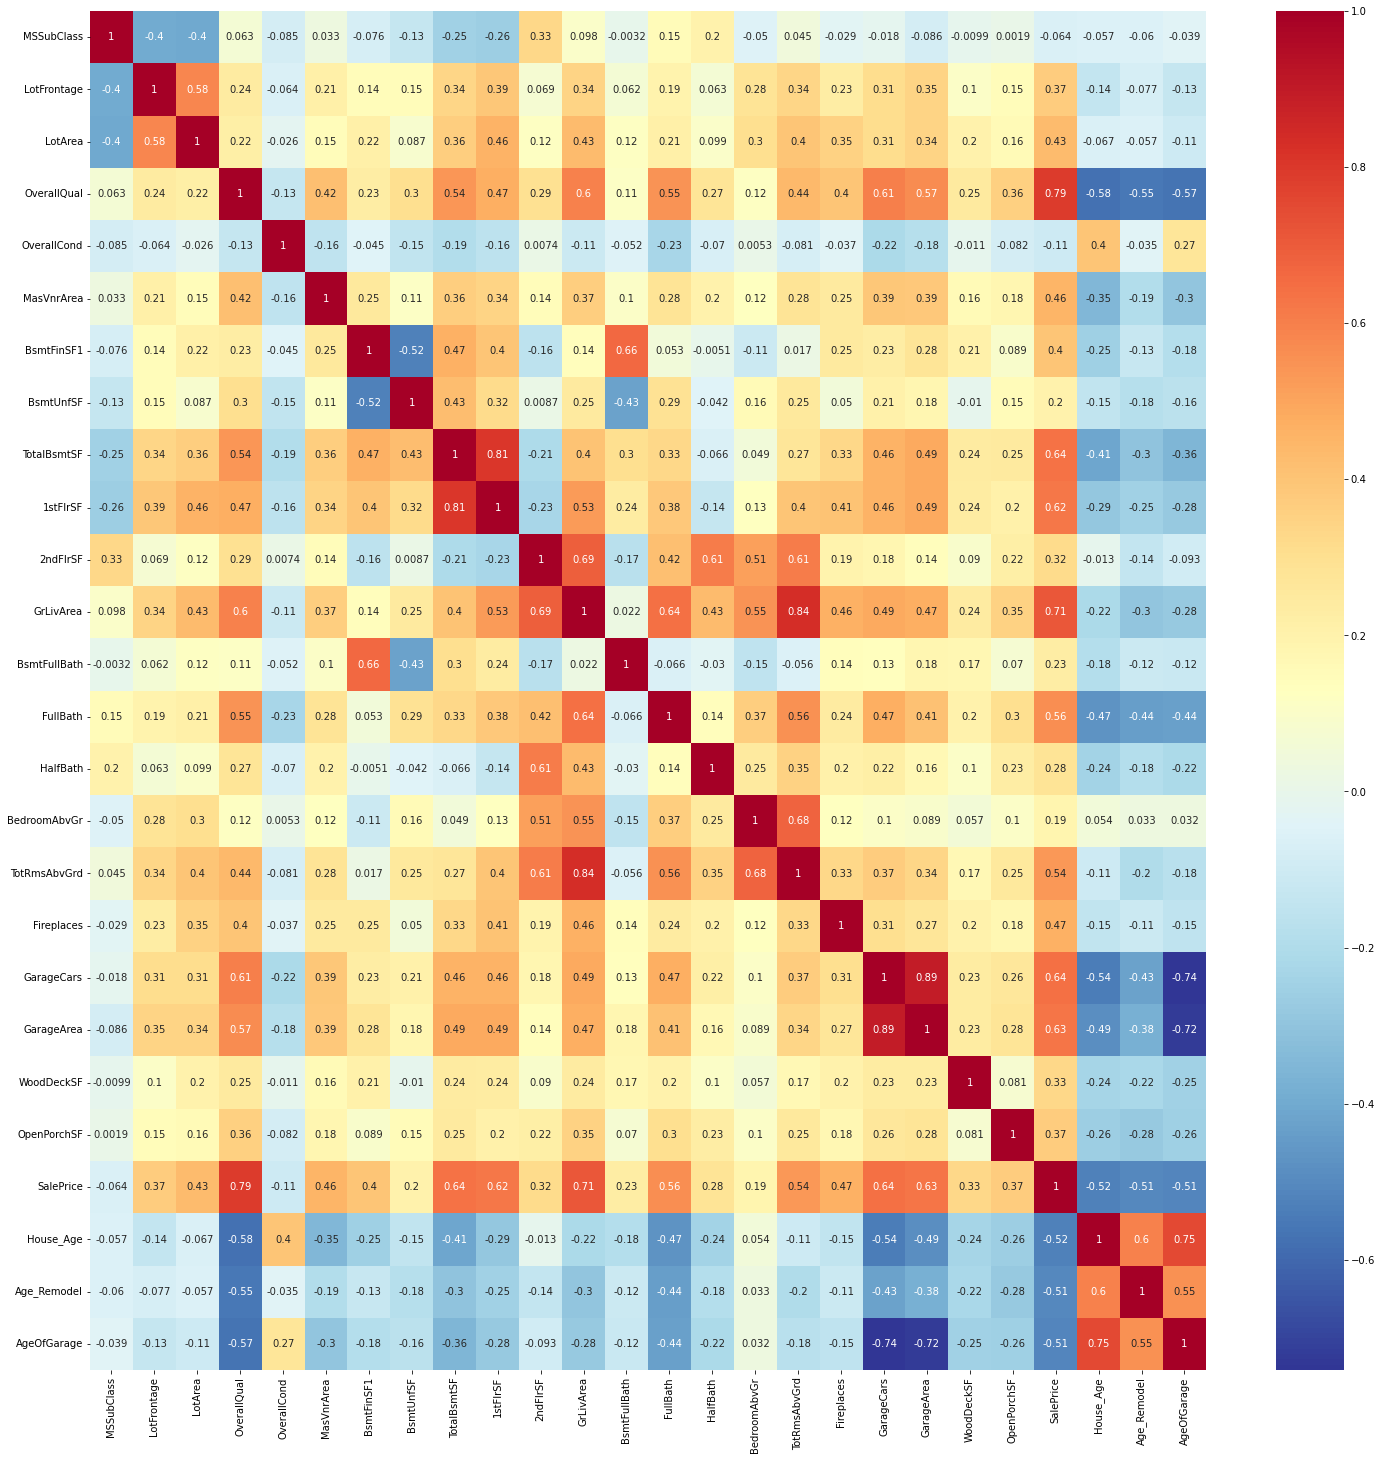

In [115]:
plt.figure(figsize=(25,25))
sns.heatmap(housing_df[numeric_cols].corr(), cmap='RdYlBu_r', annot=True);

##### Visualising some important features taken from above heatmap with respect to target variable

Correlation Values of features w.r.t. SalePrice
* LotFrontage - 37
* LotArea - 43
* OverallQual - 79
* MasVnrArea - 46
* TotalBsmtSF - 64
* 1stFlrSF - 62
* 2ndFlrSF - 32
* GrLivArea - 71
* FullBath - 56
* TotRmsAbvGrd - 54
* Fireplaces - 47
* GarageCars - 64
* GarageArea - 63
* House_Age - 52
* Age_Remodel - 51
* AgeOfGarage - 51


In [116]:
important_numerical_features = ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
                                '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                                'GarageArea', 'House_Age', 'Age_Remodel', 'AgeOfGarage']
len(important_numerical_features)

16

Plotting the scatter plot for the above numerical features

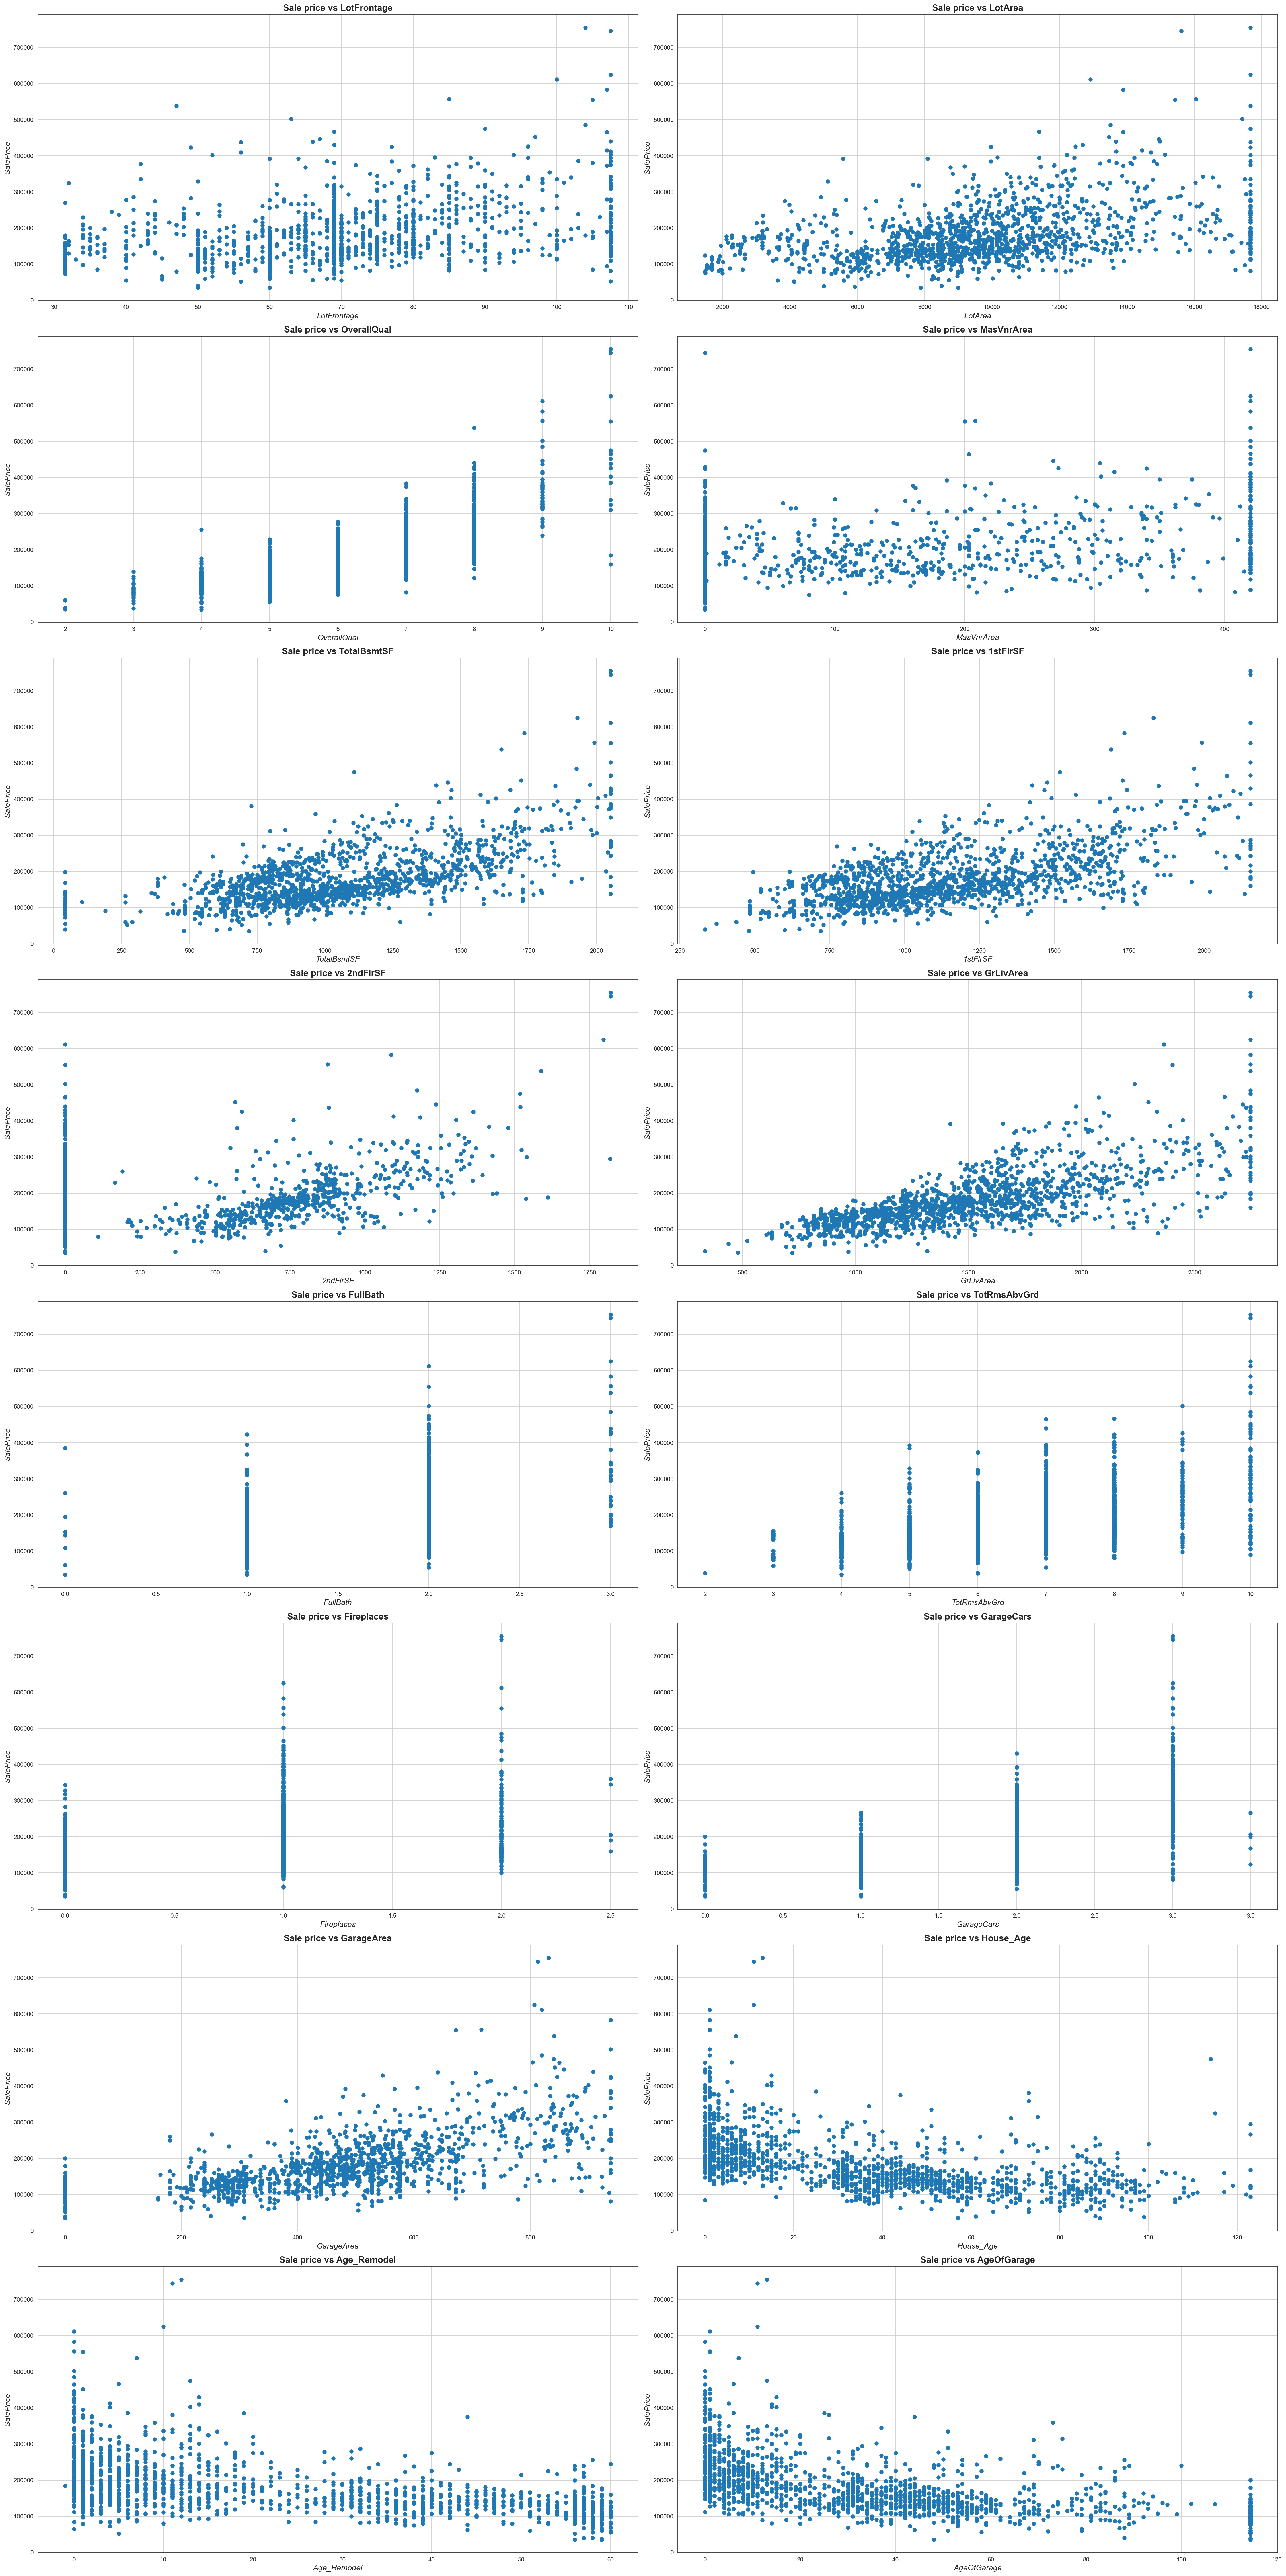

In [117]:
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(30,60), dpi=150)
sns.set_style("white")
for i in important_numerical_features:
    if (c <= len(important_numerical_features)):
        plt.subplot(a, b, c)
        plt.scatter(x=housing_df[i], y=housing_df['SalePrice'])
        plt.xlabel(i)
        plt.title(("Sale price vs "+i), fontweight='bold', fontsize=15)
        plt.xlabel(i, fontsize=13, fontstyle='italic')
        plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
        plt.grid(True)
        c = c + 1
plt.autoscale()
plt.tight_layout()
plt.show()

#### Insights: 
Some features are highly correlated. Some features which has moderate corelation, forms the linear relations with the target variable

### 3. Model Building

#### Preparing features for spliting as train and test

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
np.random.seed(0)
df_train, df_test = train_test_split(housing_df, train_size=0.7, test_size = 0.3, random_state=100)

In [120]:
print(f'df_train shape : {df_train.shape}')
print(f'df_test shape : {df_test.shape}')

df_train shape : (1021, 151)
df_test shape : (438, 151)


##### Scaling on numerical columns- 
Performing Standard Scaler to retain the effect of outliers in the data, as in the present dataset, the outliers are significant for pushing the price of the property

In [121]:
df_numerical=get_colsofType(df=housing_df, featureType=['float64','int64'])
numeric_cols = df_numerical.columns.to_list()
print(numeric_cols)
len(numeric_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'House_Age', 'Age_Remodel', 'AgeOfGarage']


27

In [122]:
## RobustScaler
from sklearn.preprocessing import RobustScaler

In [123]:
scaler = RobustScaler()

#scaler fit_transform on train data
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

#scaler transform on test data
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [124]:
print(df_train.shape)
print(df_test.shape)

(1021, 151)
(438, 151)


In [125]:
##Storing target variable to y_train and y_test respectively
# fetching the target and predictors of the model
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')

In [126]:
# fetching the target and predictors of the model
X_train = df_train
X_test = df_test

In [127]:
# Checking the data set again
X_train.head()

MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
210         -0.4    -0.111111 -0.958190         1          1          3   
318          0.2     1.166667  0.098377         1          1          2   
239          0.0    -0.944444 -0.186670         1          1          3   
986          0.0    -0.555556 -1.030497         1          1          3   
1416         1.9    -0.500000  0.452533         1          1          3   

      OverallQual  OverallCond  MasVnrArea  BsmtExposure  BsmtFinSF1  \
210          -0.5          1.0         0.0             4    0.106742   
318           0.5          0.0         1.6             1    0.835674   
239           0.0         -1.0         0.0             4   -0.418539   
986           0.0          2.5         0.0             4   -0.550562   
1416         -1.0          1.0         0.0             4   -0.550562   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
210              6         0.0  -0.111864    -0.245681 -0.405850  0.000000   
318              6         0.0  -0.172881     0.681382  0.522852  1.752407   
239              6         0.0   0.303390    -0.493282 -0.526508  0.947730   
986              6         0.0   0.038983    -0.973129 -0.155393  0.872077   
1416             6         0.0   0.533898    -0.412668  0.292505  1.436039   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
210   -0.949527           1.0      -1.0       0.0          -1.0          -0.5   
318    1.861199           1.0       0.0       1.0           1.0           1.5   
239    0.033123           0.0      -1.0       1.0           0.0           0.5   
986    0.266562           0.0      -1.0       0.0          -1.0          -0.5   
1416   1.299685           0.0       0.0       0.0           1.0           2.0   

      Functional  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
210            1        -1.0        -2.0   -1.935484    0.000000    -0.357143   
318            1         0.0         1.0    0.709677    2.023810     0.500000   
239            1         0.0        -1.0   -1.048387    0.000000     1.642857   
986            1        -1.0        -1.0   -0.907258    2.345238    -0.357143   
1416           1        -1.0         0.0    0.322581    0.000000    -0.357143   

      PoolQC  House_Age  Age_Remodel  AgeOfGarage  MSZoning_FV  MSZoning_RH  \
210        4   1.065217     1.189189     1.965116            0            0   
318        4  -0.391304     0.054054    -0.325581            0            0   
239        4   0.673913     1.243243     0.720930            0            0   
986        4   1.347826    -0.297297     0.604651            0            0   
1416       4   1.934783     1.243243     0.209302            0            0   

      MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
210             1            0            1           1           0   
318             1            0            1           1           0   
239             1            0            1           1           0   
986             0            1            1           1           0   
1416            0            1            1           1           0   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
210                 0                0                1                  0   
318                 0                1                0                  0   
239                 0                0                1                  0   
986                 0                0                1                  0   
1416                0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Edwards  \
210               0              0                 1                     1   
318               0              0                 1                     0   
239               0              0                 1                     1

In [128]:
X_train.shape

(1021, 150)

Setting variable for Lasso model without RFE

In [129]:
X_train_lasso = X_train.copy()
X_test_lasso = X_test.copy()

y_train_lasso = y_train.copy()
y_test_lasso = y_test.copy()

In [130]:
X_train_lasso_q3 = X_train.copy()
X_test_lasso_q3 = X_test.copy()

y_train_lasso_q3 = y_train.copy()
y_test_lasso_q3 = y_test.copy()

In [131]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [132]:
# Creating object LinearRegression and RFECV # neg_mean_squared_error
ols = LinearRegression()
rfecv = RFECV(estimator=ols, scoring="neg_mean_absolute_error", cv=5, min_features_to_select=50) #  
rfecv.fit(X_train, y_train)
rfecv.transform(X_train)
print(rfecv)
print(rfecv.n_features_)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=50,
      scoring='neg_mean_absolute_error')
57


In [133]:
##my_zip file zips features, rfecv.support_ and rfecv.ranking_
rfecv_zip = list(zip(X_train.columns,rfecv.support_,rfecv.ranking_))
rfecv_zip

[('MSSubClass', False, 7),
 ('LotFrontage', False, 56),
 ('LotArea', True, 1),
 ('LotShape', False, 87),
 ('Utilities', True, 1),
 ('LandSlope', False, 63),
 ('OverallQual', True, 1),
 ('OverallCond', False, 42),
 ('MasVnrArea', True, 1),
 ('BsmtExposure', False, 14),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 52),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 28),
 ('TotalBsmtSF', False, 53),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('FullBath', False, 90),
 ('HalfBath', False, 94),
 ('BedroomAbvGr', False, 5),
 ('TotRmsAbvGrd', False, 15),
 ('Functional', True, 1),
 ('Fireplaces', False, 50),
 ('GarageCars', False, 72),
 ('GarageArea', False, 19),
 ('WoodDeckSF', False, 76),
 ('OpenPorchSF', False, 60),
 ('PoolQC', True, 1),
 ('House_Age', True, 1),
 ('Age_Remodel', True, 1),
 ('AgeOfGarage', False, 68),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 2),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),


In [134]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them
top52_df = pd.DataFrame(rfecv_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top52_df = top52_df.loc[top52_df['rfe_support'] == True]
top52_df.reset_index(drop=True, inplace=True)
top52_df

Features  rfe_support  rfe_ranking
0                  LotArea         True            1
1                Utilities         True            1
2              OverallQual         True            1
3               MasVnrArea         True            1
4               BsmtFinSF1         True            1
5               BsmtFinSF2         True            1
6                 1stFlrSF         True            1
7                 2ndFlrSF         True            1
8                GrLivArea         True            1
9               Functional         True            1
10                  PoolQC         True            1
11               House_Age         True            1
12             Age_Remodel         True            1
13             MSZoning_FV         True            1
14             MSZoning_RL         True            1
15             MSZoning_RM         True            1
16      Neighborhood_Other         True            1
17         Condition1_Norm         True            1
18         Condition1_RRAe         True            1
19         Condition2_PosA         True            1
20         Condition2_PosN         True            1
21         Condition2_RRAe         True            1
22         BldgType_Duplex         True            1
23       HouseStyle_2.5Fin         True            1
24       HouseStyle_2.5Unf         True            1
25        RoofMatl_CompShg         True            1
26        RoofMatl_Membran         True            1
27          RoofMatl_Metal         True            1
28           RoofMatl_Roll         True            1
29        RoofMatl_Tar&Grv         True            1
30        RoofMatl_WdShake         True            1
31        RoofMatl_WdShngl         True            1
32         MasVnrType_None         True            1
33        MasVnrType_Stone         True            1
34         Foundation_Wood         True            1
35            Heating_GasA         True            1
36            Heating_GasW         True            1
37            Heating_Grav         True            1
38            Heating_OthW         True            1
39          Electrical_Mix         True            1
40         Electrical_None         True            1
41    GarageType_No Garage         True            1
42  GarageFinish_No Garage         True            1
43              Fence_GdWo         True            1
44             Fence_MnPrv         True            1
45              Fence_MnWw         True            1
46              Fence_None         True            1
47        MiscFeature_Othr         True            1
48        MiscFeature_TenC         True            1
49            SaleType_CWD         True            1
50            SaleType_Con         True            1
51          SaleType_ConLD         True            1
52          SaleType_ConLw         True            1
53            SaleType_New         True            1
54             SaleType_WD         True            1
55   SaleCondition_AdjLand         True            1
56   SaleCondition_Partial         True            1

In [135]:
##Checking columns that have RFECV support
col_rfe_sup = X_train.columns[rfecv.support_]
col_rfe_sup

Index(['LotArea', 'Utilities', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Functional',
       'PoolQC', 'House_Age', 'Age_Remodel', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Other', 'Condition1_Norm',
       'Condition1_RRAe', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'BldgType_Duplex', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Electrical_Mix', 'Electrical_None',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'Fence_None', 'MiscFeature_Othr',
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_C

In [136]:
##Let's Assign top 50 columns to X_train_rfe
X_train_rfe = X_train[col_rfe_sup]

In [137]:
##Making sure that we have only 50 features (supported by RFECV) in X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]             
X_test =  X_test[X_train.columns]

## 5. Model Building

## Ridge Regression

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score  #Evaluation Metrics

In [139]:
## list of alphas (lambda parameter): Ridge Regression Model
# params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
#                     9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 
                    0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',   # neg_root_mean_squared_error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
33         9.0         -0.228970        -0.238887                1
34        10.0         -0.229317        -0.238893                2
32         8.0         -0.228579        -0.238906                3
31         7.0         -0.228156        -0.238927                4
35          20         -0.231278        -0.238930                5
30         6.0         -0.227672        -0.238938                6
29         5.0         -0.227128        -0.238945                7
28         4.0         -0.226512        -0.238985                8
36          50         -0.233814        -0.239085                9
27         3.0         -0.225776        -0.239166               10
26         2.0         -0.224836        -0.239521               11
25         1.0         -0.223273        -0.240522               12
37         100         -0.236449        -0.240608               13
24         0.9         -0.223045        -0.240675               14
23         0.8         -0.222798        -0.240856               15
22         0.7         -0.222528        -0.241060               16
21         0.6         -0.222214        -0.241288               17
20         0.5         -0.221847        -0.241538               18
19         0.4         -0.221418        -0.241825               19
18         0.3         -0.220851        -0.242236               20
17         0.2         -0.220074        -0.242822               21
16         0.1         -0.218901        -0.243784               22
15        0.05         -0.218003        -0.244593               23
14        0.01         -0.216978        -0.245713               24
13       0.005         -0.216819        -0.245908               25
12       0.004         -0.216787        -0.245949               26
11       0.003         -0.216754        -0.245990               27
10       0.002         -0.216721        -0.246032               28
9        0.001         -0.216688        -0.246074               29
8       0.0009         -0.216685        -0.246078               30
7       0.0008         -0.216681        -0.246083               31
6       0.0007         -0.216678        -0.246087               32
5       0.0006         -0.216675        -0.246091               33
4       0.0005         -0.216671        -0.246096               34
3       0.0003         -0.216664        -0.246104               35
2       0.0002         -0.216661        -0.246108               36
1       0.0001         -0.216658        -0.246113               37
0      0.00001         -0.216655        -0.246117               38
38         500         -0.277461        -0.280045               39
39        1000         -0.342753        -0.344694               40

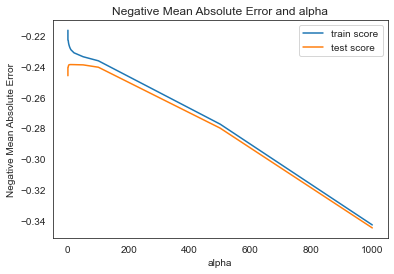

In [141]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [142]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=9.0)

In [143]:
##Checking the coefficient values with lambda (alpha) = 20

ridge = Ridge(alpha=20)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.020233556867904012
Coefficients:
 [ 0.12751605 -0.02288603  0.40506286  0.09168712  0.22416092  0.
  0.36009352  0.26700073  0.15398981 -0.10403114 -0.05143461 -0.12745987
 -0.15103971  0.08511319  0.03762584  0.01506857  0.10326546  0.17034214
 -0.10182296  0.02344494 -0.15230325 -0.01803115 -0.20560329 -0.02457837
 -0.06633001 -0.01049476  0.02667953 -0.00341085 -0.00320638 -0.00870237
 -0.03543597  0.20380072  0.13260409  0.07642476 -0.04021332 -0.03911162
 -0.0005149   0.00528095 -0.04834053  0.          0.         -0.01020825
 -0.01020825  0.01835911  0.06901411  0.03446864  0.05843185  0.01434424
  0.          0.0169187   0.03593365 -0.0077652   0.01577181  0.12078206
  0.052629    0.01126516  0.12078206]


In [144]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
variance_weighted_ridge_train = explained_variance_score(y_train, y_pred_train_r, multioutput='variance_weighted')
variance_weighted_ridge_test = explained_variance_score(y_test, y_pred_test_r, multioutput='variance_weighted')

variance_uniform_average_ridge_train = explained_variance_score(y_train, y_pred_train_r, multioutput='uniform_average')
variance_uniform_average_ridge_test = explained_variance_score(y_test, y_pred_test_r, multioutput='uniform_average')

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

# Count the number of variables
features = [featurecoeff for featurecoeff in ridge.coef_  if featurecoeff!=0]

print("For Ridge Regression Model (Original Model, alpha = 20):\n","*"*55)
print(f"Features Count: {len(features)}\n")
print("For Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_ridge_train,"\nnExplained Variance score 'uniform_average':",variance_uniform_average_ridge_train)


print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_ridge_test,"\nnExplained Variance score 'uniform_average':",variance_uniform_average_ridge_test,"\n","*"*55)

For Ridge Regression Model (Original Model, alpha = 20):
 *******************************************************
Features Count: 53

For Train Set:
R2 score: 0.8398507039680327 
MSE score: 0.14016969174155813 
MAE score: 0.23136457067931518 
RMSE score: 0.3743924301338879 
Explained Variance Score 'variance_weighted': 0.8398507039680326 
nExplained Variance score 'uniform_average': 0.8398507039680326

For Test Set:
R2 score: 0.8287247366362329 
MSE score: 0.154368221883979 
MAE score: 0.25331057886027014 
RMSE score: 0.39289721541896805 
Explained Variance Score 'variance_weighted': 0.8287670024893685 
nExplained Variance score 'uniform_average': 0.8287670024893685 
 *******************************************************


In [145]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0       OverallQual       0.4051                            0.4051
1          1stFlrSF       0.3601                            0.3601
2          2ndFlrSF       0.2670                            0.2670
3        BsmtFinSF1       0.2242                            0.2242
4   BldgType_Duplex      -0.2056                            0.2056
5  RoofMatl_WdShngl       0.2038                            0.2038
6   Condition1_Norm       0.1703                            0.1703
7         GrLivArea       0.1540                            0.1540
8   Condition2_PosN      -0.1523                            0.1523
9       Age_Remodel      -0.1510                            0.1510

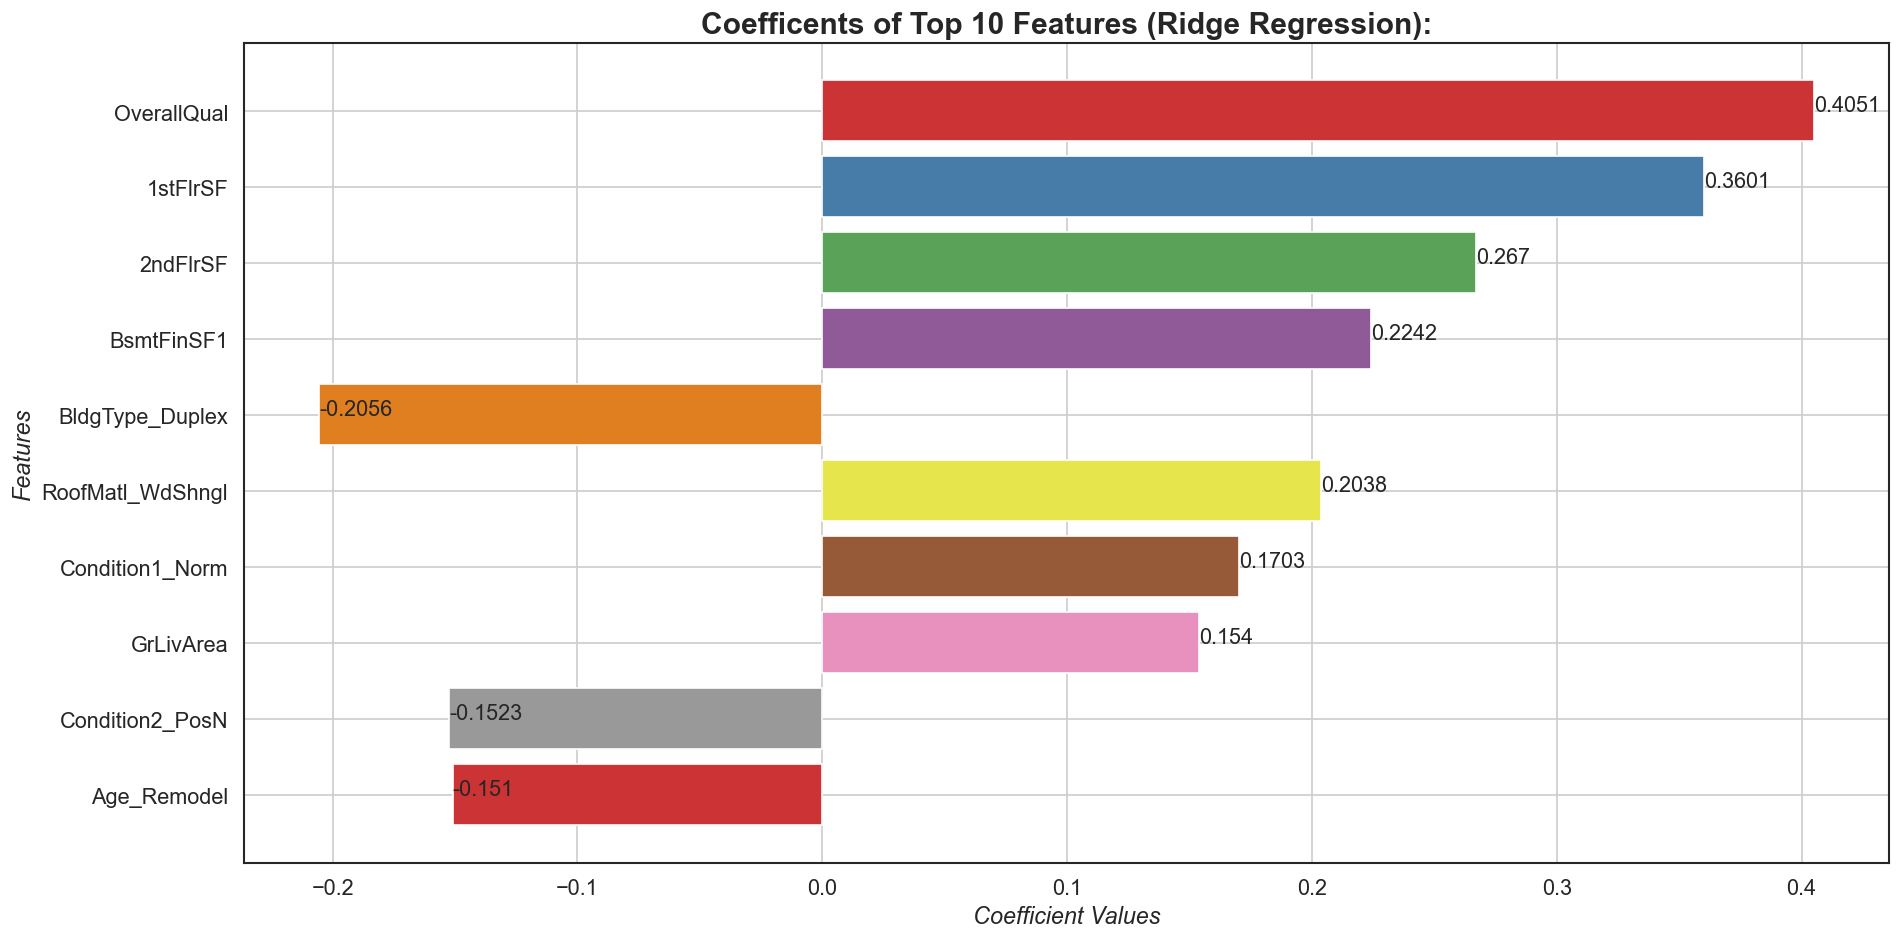

In [146]:
## Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

The chart mentioned above displays the Top 10 predictors based on the Ridge Regression model, that are significant in predicting the sale price of the house.

Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed (as it is one of the major assumptions of linear regression).

For Train Set:

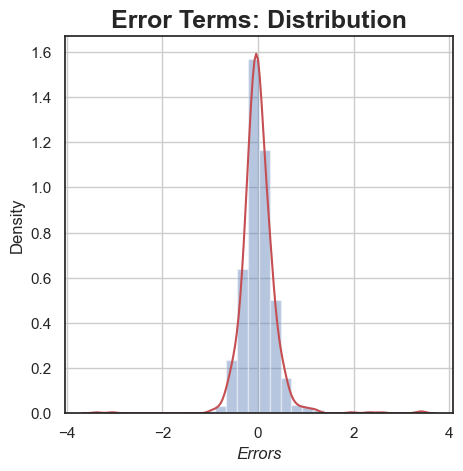

In [147]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30,  kde_kws={"color": "r", "lw": 1.5})
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

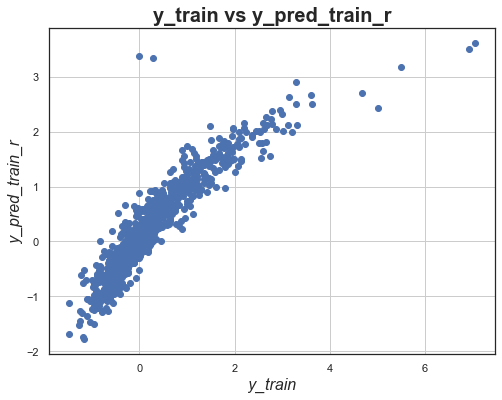

In [148]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [149]:
y_train.shape[0]

1021

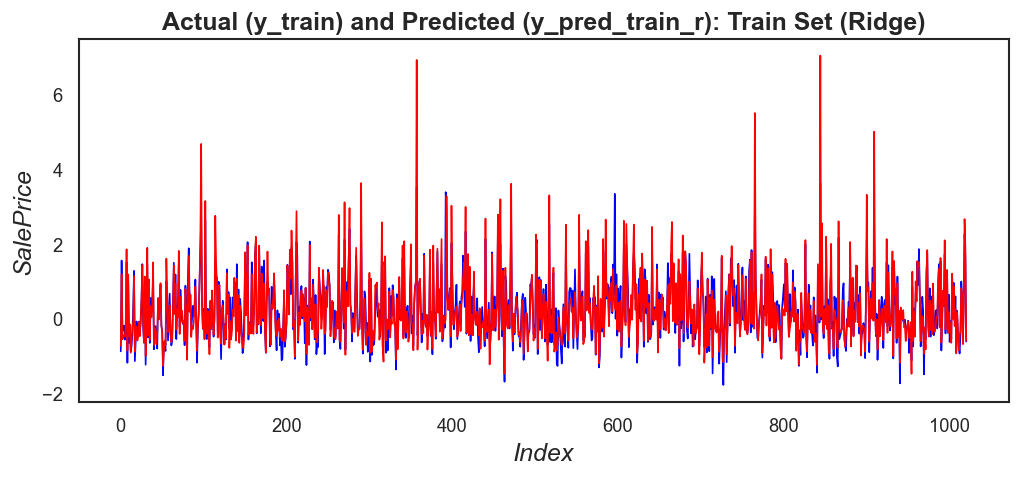

In [150]:

# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f = [i for i in range(0,y_train.shape[0],1)] # y_train has 1021 observations
g = [i for i in range(0,y_train.shape[0],1)]
plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()


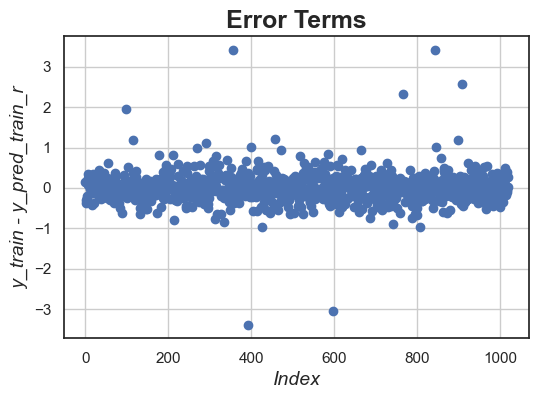

In [151]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,y_train.shape[0],1)] #For 1021 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j,res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

### Lasso Regression:

In [152]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# lasso_model_cv.fit(X_train, y_train)
lasso_model_cv.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
10       0.002         -0.204183        -0.225143                1
11       0.003         -0.208657        -0.225641                2
12       0.004         -0.212755        -0.226354                3
13       0.005         -0.215718        -0.227223                4
9        0.001         -0.200622        -0.228275                5
8       0.0009         -0.200228        -0.229130                6
7       0.0008         -0.199814        -0.230114                7
6       0.0007         -0.199237        -0.231216                8
14        0.01         -0.223655        -0.232021                9
5       0.0006         -0.198537        -0.232359               10
4       0.0005         -0.197284        -0.234020               11
3       0.0003         -0.193072        -0.236643               12
2       0.0002         -0.191198        -0.239275               13
1       0.0001         -0.189740        -0.243181               14
0      0.00001         -0.188322        -0.247291               15
15        0.05         -0.255038        -0.258242               16
16         0.1         -0.284779        -0.286752               17
17         0.2         -0.351866        -0.353815               18
18         0.3         -0.453769        -0.455093               19
19         0.4         -0.565908        -0.567648               20
20         0.5         -0.667274        -0.668250               21
37         100         -0.680631        -0.681441               22
36          50         -0.680631        -0.681441               22
35          20         -0.680631        -0.681441               22
34        10.0         -0.680631        -0.681441               22
33         9.0         -0.680631        -0.681441               22
32         8.0         -0.680631        -0.681441               22
31         7.0         -0.680631        -0.681441               22
30         6.0         -0.680631        -0.681441               22
29         5.0         -0.680631        -0.681441               22
28         4.0         -0.680631        -0.681441               22
27         3.0         -0.680631        -0.681441               22
26         2.0         -0.680631        -0.681441               22
25         1.0         -0.680631        -0.681441               22
24         0.9         -0.680631        -0.681441               22
23         0.8         -0.680631        -0.681441               22
22         0.7         -0.680631        -0.681441               22
21         0.6         -0.680631        -0.681441               22
38         500         -0.680631        -0.681441               22
39        1000         -0.680631        -0.681441               22

In [154]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# lasso_model_cv.fit(X_train, y_train)
lasso_model_cv.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
11       0.002         -0.204183        -0.225143                1
12       0.003         -0.208657        -0.225641                2
13       0.005         -0.215718        -0.227223                3
10       0.001         -0.200622        -0.228275                4
9       0.0009         -0.200228        -0.229130                5
8       0.0008         -0.199814        -0.230114                6
7       0.0007         -0.199237        -0.231216                7
14        0.01         -0.223655        -0.232021                8
6       0.0006         -0.198537        -0.232359                9
5       0.0005         -0.197284        -0.234020               10
4       0.0004         -0.195258        -0.235397               11
3       0.0003         -0.193072        -0.236643               12
2       0.0002         -0.191198        -0.239275               13
15        0.02         -0.235982        -0.241988               14
1       0.0001         -0.189740        -0.243181               15
0      0.00001         -0.188322        -0.247291               16
16        0.05         -0.255038        -0.258242               17

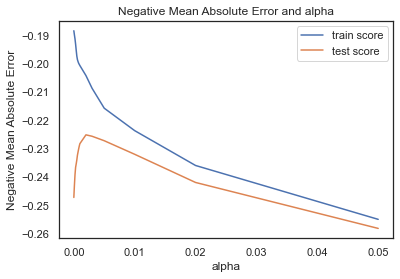

In [156]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [157]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.002)

In [158]:
# check the coefficient values with lambda = 0.002

lasso = Lasso(alpha=0.002)
        
# lasso.fit(X_train, y_train) 
lasso.fit(X_train_lasso, y_train_lasso)
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.18746880531302101
Coefficients:
  [-9.13685147e-02  2.81163554e-02  5.50503889e-02 -1.68514902e-02
 -0.00000000e+00 -2.01509195e-02  3.19622328e-01  6.43760165e-02
  6.55071016e-02 -6.51661368e-02  1.67927037e-01 -2.83949792e-03
  0.00000000e+00  0.00000000e+00  9.61761751e-02  4.28289445e-01
  5.80260412e-01 -0.00000000e+00  2.19670720e-02  1.21630607e-02
 -0.00000000e+00 -8.18211013e-02  0.00000000e+00 -7.41019322e-02
  4.62969193e-02  7.54423881e-02  2.20056148e-02  1.66563479e-02
  9.98831113e-03 -0.00000000e+00 -1.15777800e-01 -4.85784643e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.34848258e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.58218975e-02  0.00000000e+00  8.23816298e-02  6.71923987e-02
 -0.00000000e+00 -0.00000000e+00  9.48288336e-03 -1.31624876e-02
 -0.00000000e+00  1.31420728e-03  0.00000000e+00  1.18334934e-01
  1.44847768e-01 -1.25395871e-02  1.74532834e-01  0.00000000e+00
 -0.00000000e+00 -2.23254702e-02  0.00000

In [159]:
##Making predictions for train and test sets: Lasso Regression Model

y_pred_train_l = lasso.predict(X_train_lasso)
y_pred_test_l = lasso.predict(X_test_lasso)

## R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train_lasso, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test_lasso, y_pred= y_pred_test_l)

## Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train_lasso, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test_lasso, y_pred_test_l)

## Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train_lasso, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test_lasso, y_pred_test_l)

## Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

# Count the number of variables
# features = [featurecoeff for featurecoeff in lasso.coef_  if featurecoeff!=0]

variance_lasso_train = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='variance_weighted')
variance_lasso_test = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='variance_weighted')

variance_lasso_train1 = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='uniform_average')
variance_lasso_test1 = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='uniform_average')

features = len(lasso.coef_[lasso.coef_ != 0])

print("For Lasso Regression Model (Original Model: alpha=0.002):\n","*"*55)
print(f"Features Count: {features}\n")
print("For Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train,"\nExplained Variance Score 'variance_weighted':",variance_lasso_train,"\nExplained Variance Score 'uniform_average':",variance_lasso_train1)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\nExplained Variance Score 'variance_weighted':",variance_lasso_test,"\nExplained Variance Score 'uniform_average':",variance_lasso_test1,"\n","*"*55)

For Lasso Regression Model (Original Model: alpha=0.002):
 *******************************************************
Features Count: 62

For Train Set:
R2 score: 0.87612981055564 
MSE score: 0.10841662561487976 
MAE score: 0.20622896345691352 
RMSE score: 0.3292668000495643 
Explained Variance Score 'variance_weighted': 0.87612981055564 
Explained Variance Score 'uniform_average': 0.87612981055564

For Test Set:
R2 score: 0.8521024603119055 
MSE score: 0.13329817613053013 
MAE score: 0.23212845069461388 
RMSE score: 0.3651002275136653 
Explained Variance Score 'variance_weighted': 0.8522927217880165 
Explained Variance Score 'uniform_average': 0.8522927217880165 
 *******************************************************


In [160]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0       Condition2_PosN      -1.4059                            1.4059
1      RoofMatl_WdShngl       0.6085                            0.6085
2              2ndFlrSF       0.5803                            0.5803
3              1stFlrSF       0.4283                            0.4283
4           OverallQual       0.3196                            0.3196
5       Condition1_Norm       0.1745                            0.1745
6            BsmtFinSF1       0.1679                            0.1679
7          SaleType_New       0.1582                            0.1582
8       Foundation_Slab       0.1555                            0.1555
9  Neighborhood_Somerst       0.1448                            0.1448

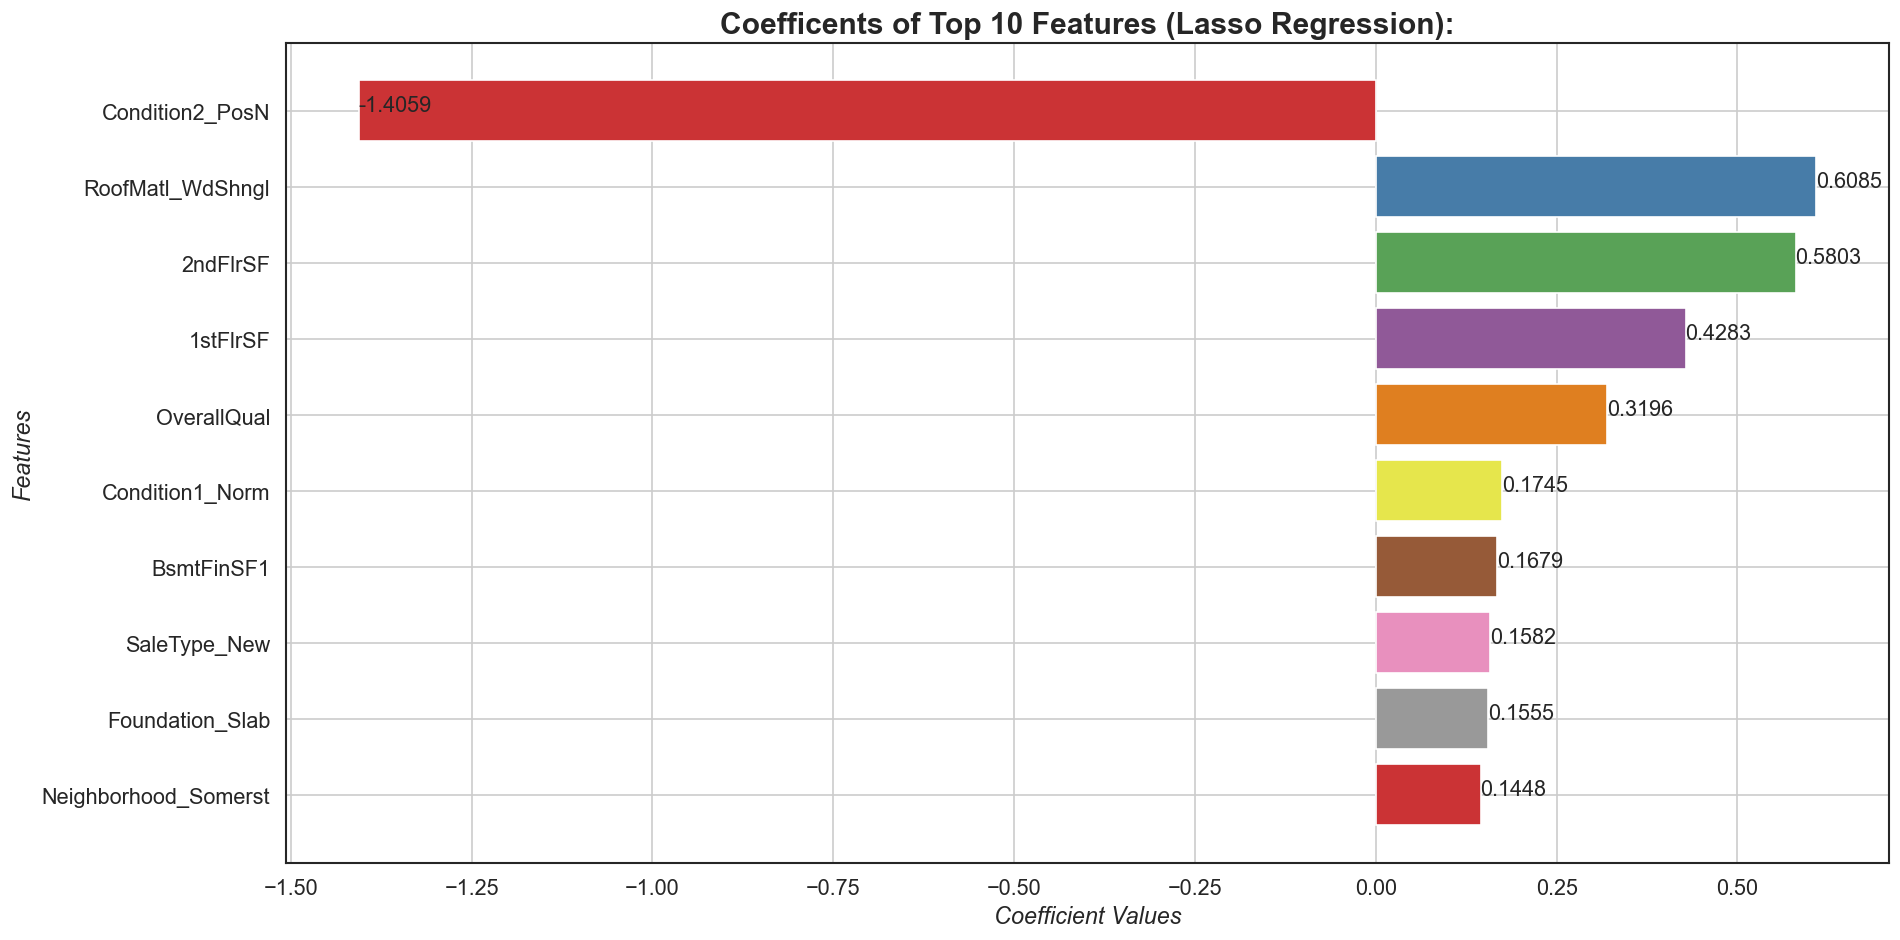

In [161]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [162]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', '1stFlrSF', 'OverallQual']

Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed (as it is one of the major assumptions of linear regression).

For Train Set:

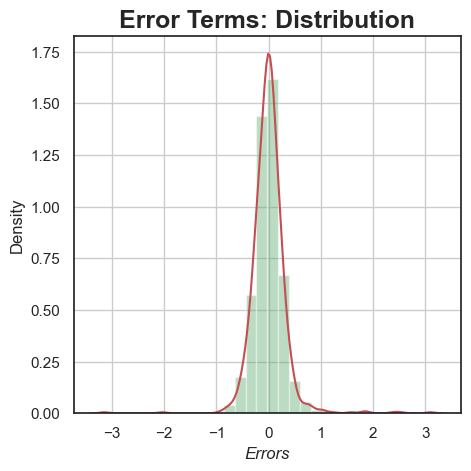

In [163]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train_lasso - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g',  kde_kws={"color": "r", "lw": 1.5})
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

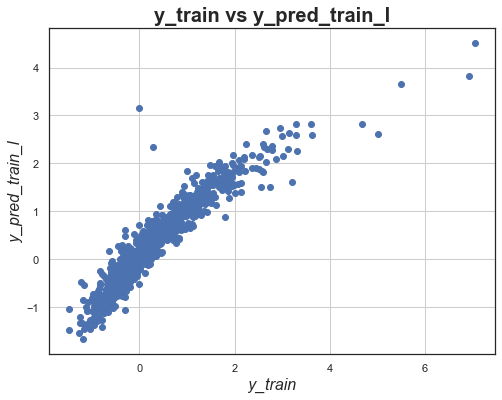

In [164]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train_lasso,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [165]:
y_train_lasso.shape[0]

1021

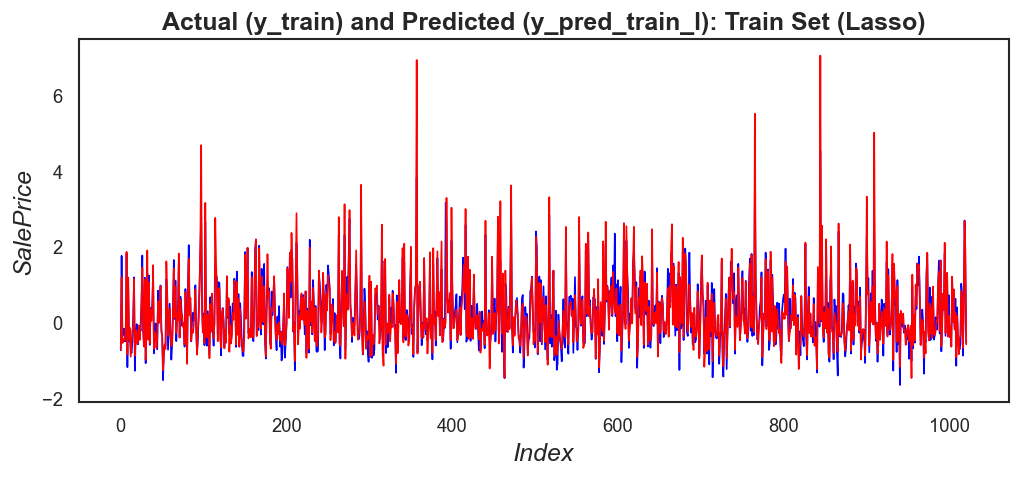

In [166]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,y_train_lasso.shape[0],1)] # Since y_train has 1021 observations
g1 = [i for i in range(0,y_train_lasso.shape[0],1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train_lasso, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

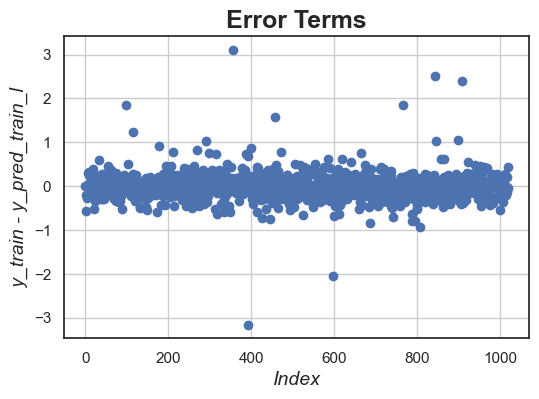

In [167]:

# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,y_train_lasso.shape[0],1)] #For 1021 observations in the train set
res_train1 = (y_train_lasso-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

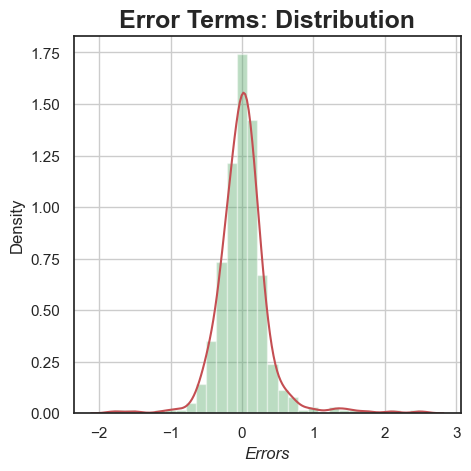

In [168]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test_lasso - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g',  kde_kws={"color": "r", "lw": 1.5})
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

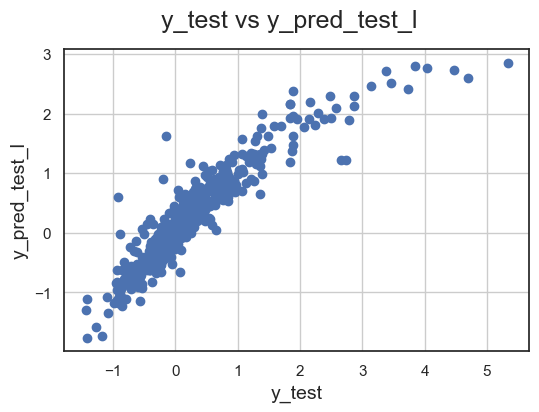

In [169]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test_lasso,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [170]:
y_test_lasso.shape[0]

438

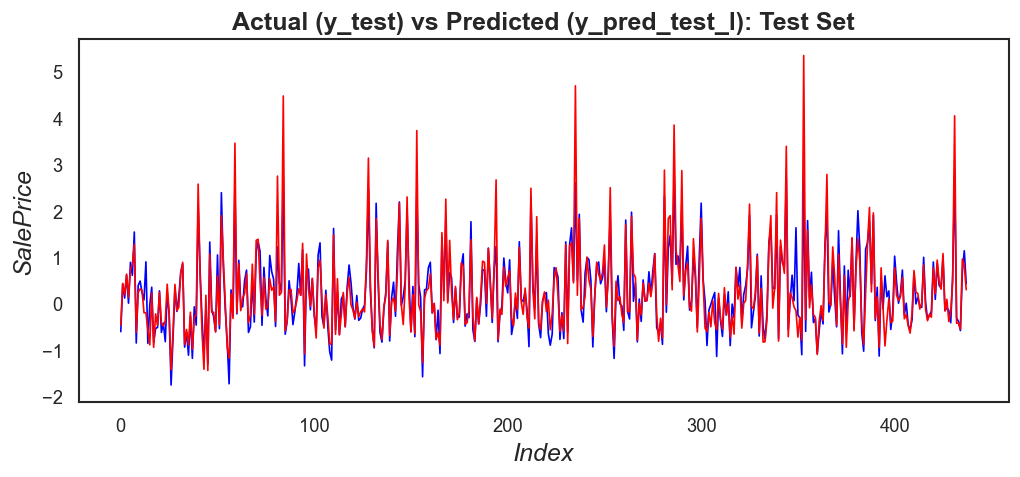

In [171]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,y_test_lasso.shape[0],1)] #As test set has 415 observations
l2 = [i for i in range(0,y_test_lasso.shape[0],1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test_lasso, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

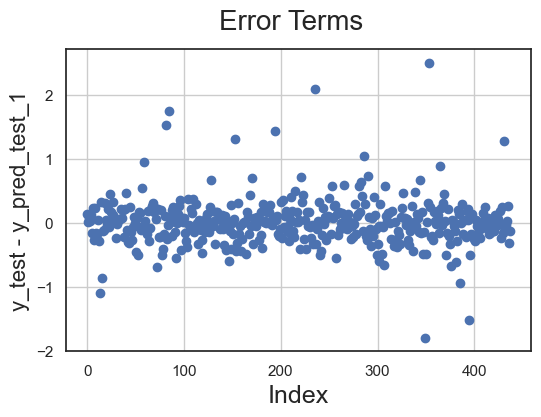

In [172]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,y_test_lasso.shape[0],1)] #For 438 observations in the test set
res_test1 = (y_test_lasso-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

### Answers for Questions in Subjective to pdf File

#### Question 1

##### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

<pre>
Optimal Value of alpha for ridge and lasso regression 

optimal_alpha_ridge = 20.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.002    (Computed Above: For Lasso Regression)

Changes to the model when we double the value of alpha for both ridge and lasso regression

### Ridge Regression

In [173]:
##Checking the outcome: coefficient values with double the value of alpha = 20*2 = 40

ridge = Ridge(alpha=40)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  0.06341091863371295
Coefficients:
 [ 0.13005461 -0.01236994  0.39854196  0.08503834  0.21810845  0.
  0.30079316  0.19721685  0.20940023 -0.09967761 -0.04507359 -0.12981366
 -0.15458787  0.05921491  0.02239086 -0.00211032  0.09834987  0.15271282
 -0.06631729  0.01176238 -0.07485319 -0.01037568 -0.15774884 -0.01194326
 -0.0355256  -0.01526612  0.01349282 -0.00166655 -0.00319672 -0.00573871
 -0.01983114  0.11479656  0.10357624  0.06637366 -0.02049487 -0.02131281
  0.00227387  0.0044126  -0.02392759  0.          0.         -0.01439823
 -0.01439823  0.00411809  0.04431743  0.01528195  0.04085818  0.00700424
  0.          0.00773467  0.01866028 -0.0084663   0.00523475  0.10179596
  0.02500372  0.00488733  0.10179596]


In [174]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
variance_weighted_ridge_train = explained_variance_score(y_train, y_pred_train_r, multioutput='variance_weighted')
variance_weighted_ridge_test = explained_variance_score(y_test, y_pred_test_r, multioutput='variance_weighted')

variance_uniform_average_ridge_train = explained_variance_score(y_train, y_pred_train_r, multioutput='uniform_average')
variance_uniform_average_ridge_test = explained_variance_score(y_test, y_pred_test_r, multioutput='uniform_average')

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

# Count the number of variables
features = [featurecoeff for featurecoeff in ridge.coef_  if featurecoeff!=0]

print("For Ridge Regression Model (Doubled alpha Model, alpha : 20 * 2 = 40):\n","*"*55)
print(f"Features Count: {len(features)}\n")
print("For Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_ridge_train,"\nExplained Variance score 'uniform_average':",variance_uniform_average_ridge_train)


print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_ridge_test,"\nExplained Variance score 'uniform_average':",variance_uniform_average_ridge_test,"\n","*"*55)

For Ridge Regression Model (Doubled alpha Model, alpha : 20 * 2 = 40):
 *******************************************************
Features Count: 53

For Train Set:
R2 score: 0.8343493464389597 
MSE score: 0.14498472126785922 
MAE score: 0.23313100045286583 
RMSE score: 0.38076859280652237 
Explained Variance Score 'variance_weighted': 0.8343493464389597 
Explained Variance score 'uniform_average': 0.8343493464389597

For Test Set:
R2 score: 0.8253982442579028 
MSE score: 0.15736634726103826 
MAE score: 0.25182081235668946 
RMSE score: 0.3966942742982791 
Explained Variance Score 'variance_weighted': 0.825461919488443 
Explained Variance score 'uniform_average': 0.8254619194884432 
 *******************************************************


In [175]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0      OverallQual       0.3985                            0.3985
1         1stFlrSF       0.3008                            0.3008
2       BsmtFinSF1       0.2181                            0.2181
3        GrLivArea       0.2094                            0.2094
4         2ndFlrSF       0.1972                            0.1972
5  BldgType_Duplex      -0.1577                            0.1577
6      Age_Remodel      -0.1546                            0.1546
7  Condition1_Norm       0.1527                            0.1527
8          LotArea       0.1301                            0.1301
9        House_Age      -0.1298                            0.1298

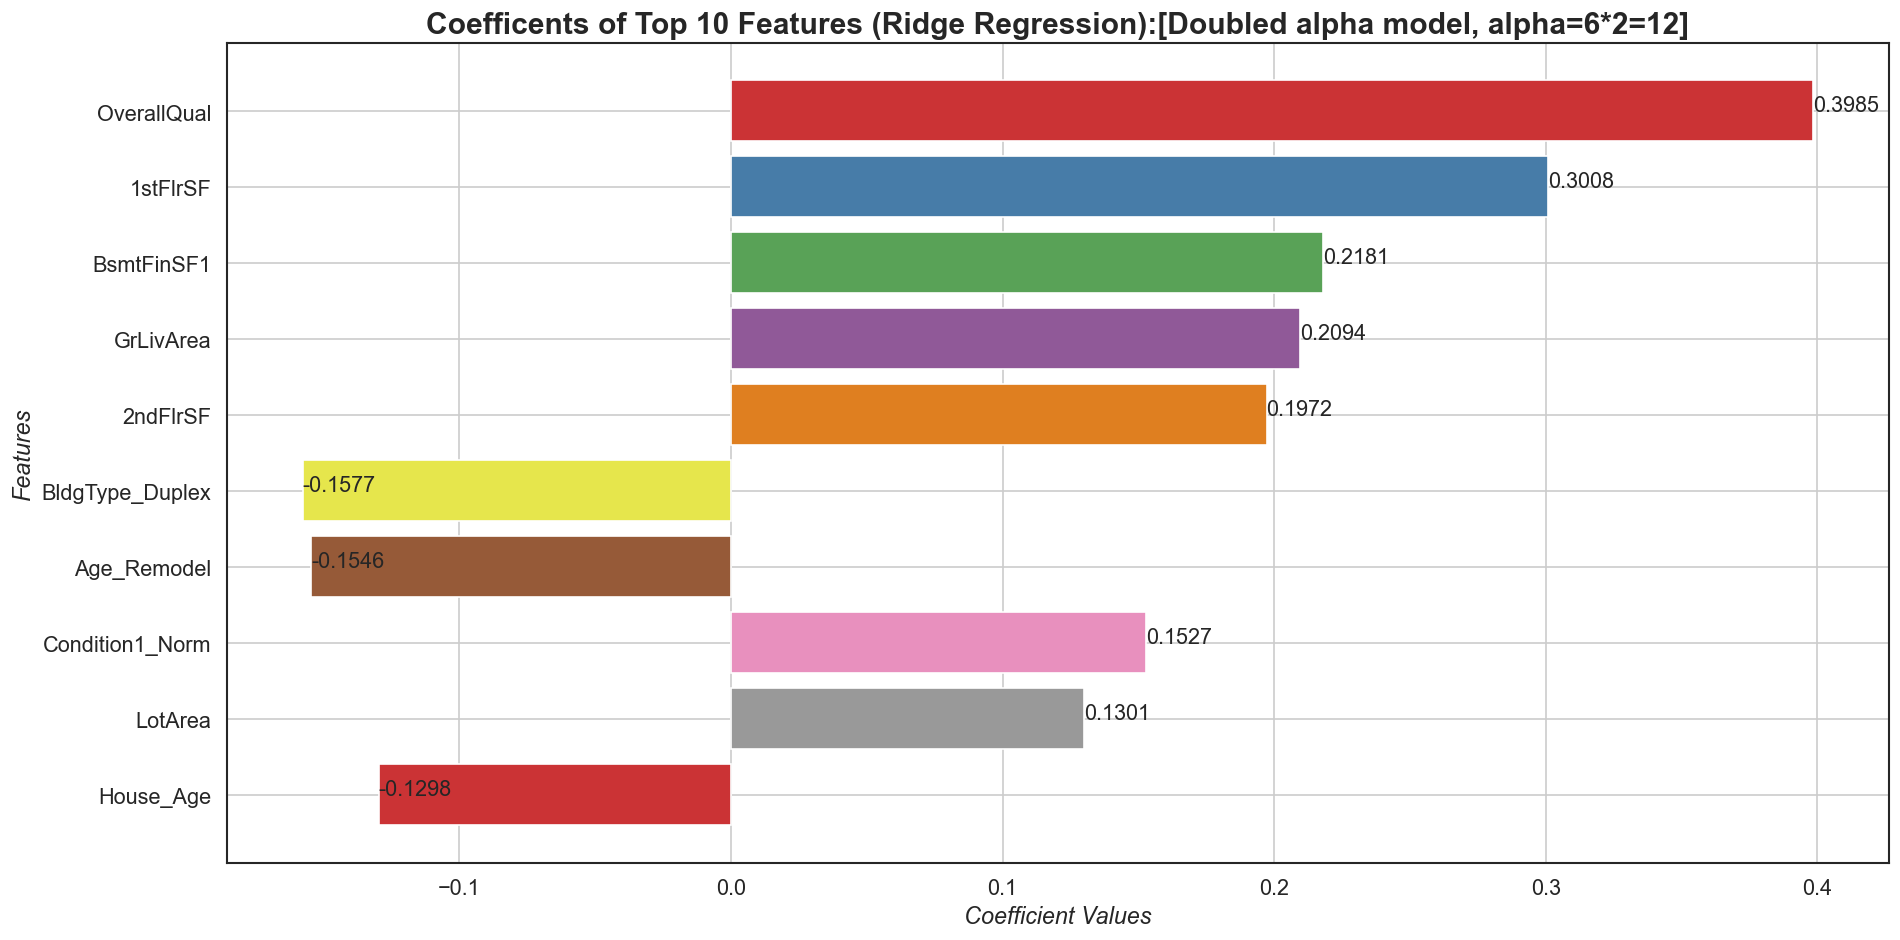

In [176]:
##Coefficient value plot (Ridge Regression)

top10_ridge_doubled_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_doubled_df['Features'], x=top10_ridge_doubled_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=6*2=12]', fontsize=18,fontweight='bold')

coef= top10_ridge_doubled_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [177]:
print("For Ridge Regression (alpha model, alpha=20): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (alpha model, alpha=20): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['OverallQual', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BldgType_Duplex', 'RoofMatl_WdShngl', 'Condition1_Norm', 'GrLivArea', 'Condition2_PosN', 'Age_Remodel'] 
 *****************************************************************************************************************************


In [178]:
print("For Ridge Regression (Doubled alpha model, alpha=20*2=40): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_doubled_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=20*2=40): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['OverallQual', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', '2ndFlrSF', 'BldgType_Duplex', 'Age_Remodel', 'Condition1_Norm', 'LotArea', 'House_Age'] 
 *****************************************************************************************************************************


#### Question 2

<pre><font size=4pt family='verdana' style='bold'>What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

<pre> <font size=4pt family='verdana' style='italic' color='blue'> 
Optimal Value for alpha
For ridge : 20
For lasso : 0.002

In [179]:
# check the coefficient values with lambda = 0.002 * 2 = 0.004

lasso = Lasso(alpha=0.004)
        
lasso.fit(X_train_lasso, y_train_lasso) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.10639577928499222
Coefficients:
  [-9.39144060e-02  2.07297058e-02  5.75972588e-02 -1.63844347e-03
 -0.00000000e+00 -0.00000000e+00  3.36530260e-01  5.65094126e-02
  5.49358222e-02 -6.10562759e-02  1.61701974e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  9.09259726e-02  4.19563167e-01
  5.33110454e-01  0.00000000e+00  1.48156257e-02  1.73016072e-03
  0.00000000e+00 -7.24136909e-02  0.00000000e+00 -6.75079695e-02
  4.95405100e-02  6.44535130e-02  2.91503191e-02  2.01056694e-02
  9.15382450e-03 -0.00000000e+00 -1.15269599e-01 -5.72068231e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.67580708e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.07719670e-02  1.13603420e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.10668337e-01
  1.04864270e-01 -0.00000000e+00  1.72924348e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000

In [180]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train_lasso)
y_pred_test_l = lasso.predict(X_test_lasso)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train_lasso, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test_lasso, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train_lasso, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test_lasso, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train_lasso, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test_lasso, y_pred_test_l)


##Mean Absolute error for train and test sets
variance_weighted_lasso_train = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='variance_weighted')
variance_weighted_lasso_test = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='variance_weighted')

variance_uniform_average_lasso_train = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='uniform_average')
variance_uniform_average_lasso_test = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='uniform_average')

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)
"""
print("For Lasso Regression Model (Original Model: alpha=0.002 * 2 = 0.006):\n","*"*55)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*55)

"""

# Count the number of variables
features = [featurecoeff for featurecoeff in lasso.coef_  if featurecoeff!=0]

print("For Lasso Regression Model (Doubled alpha Model, alpha=0.002*2 = 0.004):\n","*"*55)
print(f"Features Count: {len(features)}\n")
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_lasso_train,"\nExplained Variance score 'uniform_average':",variance_uniform_average_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\nExplained Variance Score 'variance_weighted':",\
      variance_weighted_lasso_test,"\nExplained Variance score 'uniform_average':",variance_uniform_average_lasso_test,"\n","*"*55)

For Lasso Regression Model (Doubled alpha Model, alpha=0.002*2 = 0.004):
 *******************************************************
Features Count: 45


For Train Set:
R2 score: 0.8343493464389597 
MSE score: 0.14498472126785922 
MAE score: 0.23313100045286583 
RMSE score: 0.38076859280652237 
Explained Variance Score 'variance_weighted': 0.8571591328229665 
Explained Variance score 'uniform_average': 0.8571591328229666

For Test Set:
R2 score: 0.8253982442579028 
MSE score: 0.15736634726103826 
MAE score: 0.25182081235668946 
RMSE score: 0.3966942742982791 
Explained Variance Score 'variance_weighted': 0.8470018925583762 
Explained Variance score 'uniform_average': 0.8470018925583762 
 *******************************************************


In [181]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0              2ndFlrSF       0.5331                            0.5331
1              1stFlrSF       0.4196                            0.4196
2           OverallQual       0.3365                            0.3365
3       Condition1_Norm       0.1729                            0.1729
4            BsmtFinSF1       0.1617                            0.1617
5          SaleType_New       0.1202                            0.1202
6             House_Age      -0.1153                            0.1153
7    Neighborhood_Other       0.1107                            0.1107
8  Neighborhood_Somerst       0.1049                            0.1049
9            MSSubClass      -0.0939                            0.0939

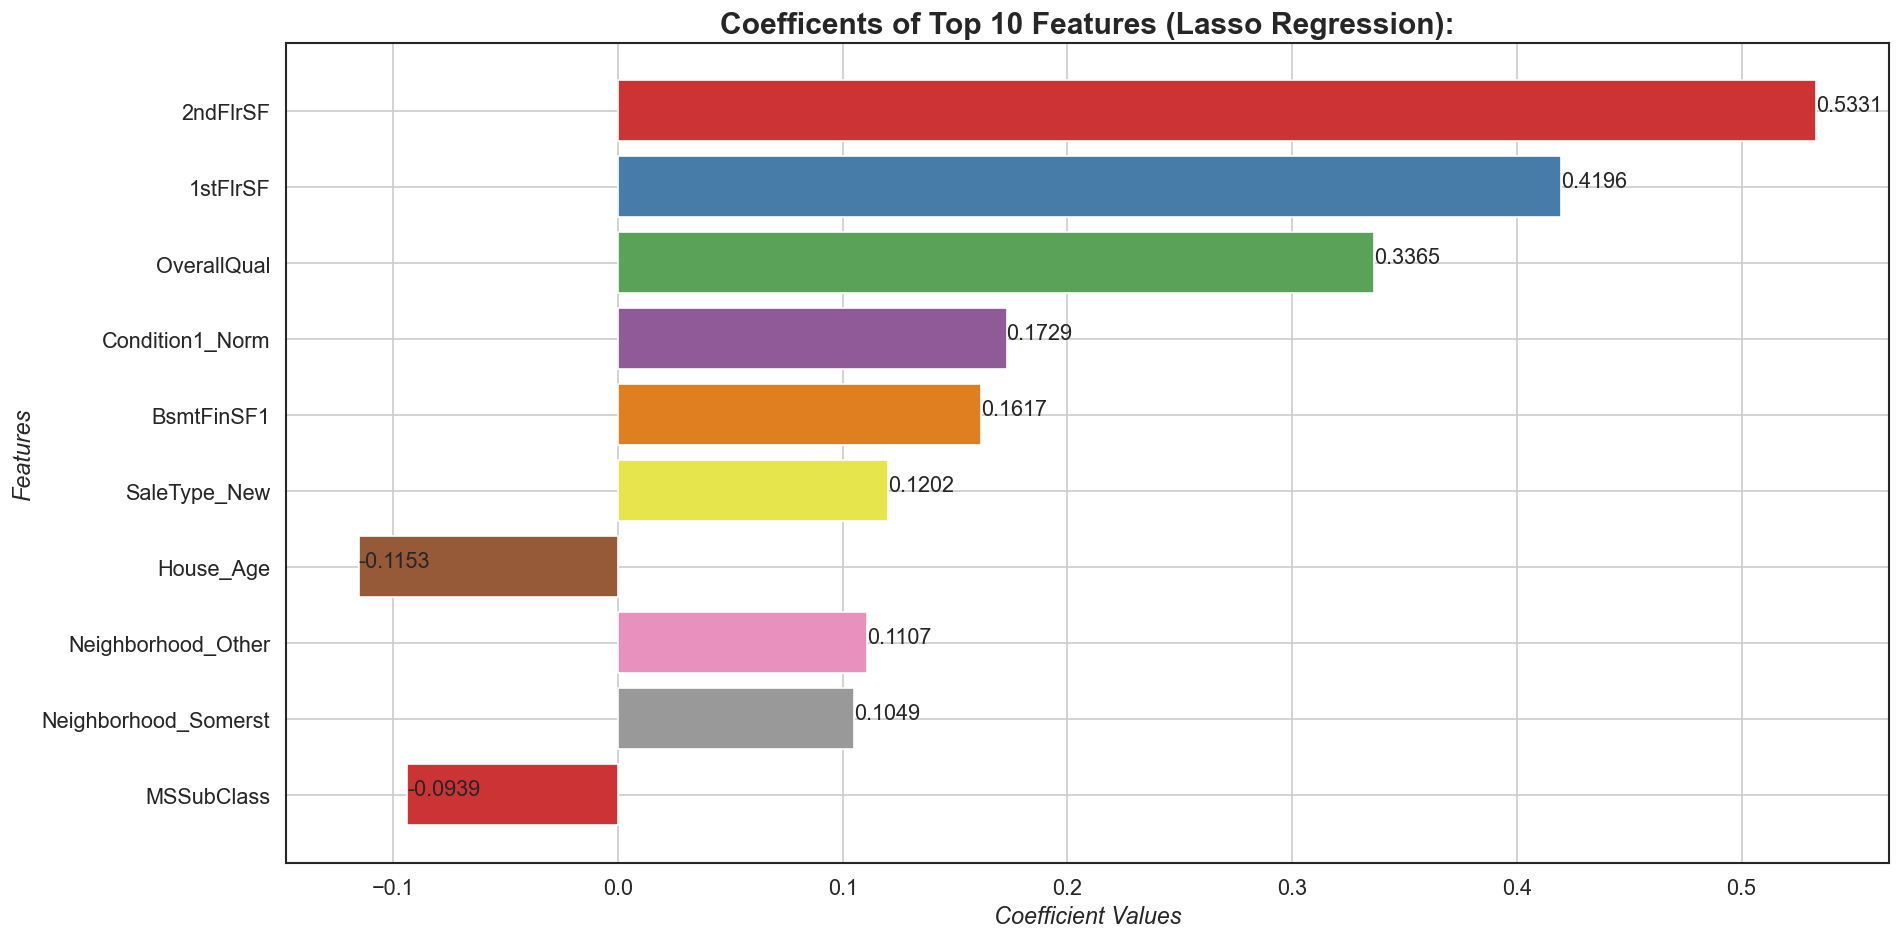

In [182]:
##Coefficient value plot (Lasso Regression)

top10_lasso_doubled_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_doubled_df['Features'], x=top10_lasso_doubled_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_doubled_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [183]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_doubled_features = list(top10_lasso_doubled_df['Features'].iloc[0:5])
top5_original_lasso_doubled_features

['2ndFlrSF', '1stFlrSF', 'OverallQual', 'Condition1_Norm', 'BsmtFinSF1']

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [184]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_doubled_features)

Top 5 features in original lasso model (dropped):
 ['2ndFlrSF', '1stFlrSF', 'OverallQual', 'Condition1_Norm', 'BsmtFinSF1']


In [185]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_features)

Top 5 features in original lasso model (dropped):
 ['Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', '1stFlrSF', 'OverallQual']


In [186]:
print(X_train_lasso_q3.shape)
print(X_test_lasso_q3.shape)

print(y_train_lasso_q3.shape)
print(y_test_lasso_q3.shape)

(1021, 150)
(438, 150)
(1021,)
(438,)


In [187]:
X_train_lasso = X_train_lasso_q3.drop(top5_original_lasso_features,axis=1)
X_test_lasso = X_test_lasso_q3.drop(top5_original_lasso_features,axis=1)

In [188]:
print(X_train_lasso.shape)
print(X_test_lasso.shape)

print(y_train_lasso_q3.shape)
print(y_test_lasso_q3.shape)

(1021, 145)
(438, 145)
(1021,)
(438,)


#### Lasso Regression after dropping top 5 variables

In [189]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# lasso_model_cv.fit(X_train, y_train)
lasso_model_cv.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
12       0.004         -0.231301        -0.243837                1
13       0.005         -0.232402        -0.243913                2
11       0.003         -0.229695        -0.243925                3
10       0.002         -0.227236        -0.244839                4
14        0.01         -0.238942        -0.248043                5
9        0.001         -0.223522        -0.248781                6
8       0.0009         -0.222984        -0.249696                7
7       0.0008         -0.222401        -0.250873                8
6       0.0007         -0.221845        -0.252619                9
5       0.0006         -0.221273        -0.254613               10
4       0.0005         -0.220584        -0.256686               11
3       0.0003         -0.219035        -0.262812               12
2       0.0002         -0.218154        -0.267042               13
1       0.0001         -0.217551        -0.273099               14
15        0.05         -0.275366        -0.279573               15
0      0.00001         -0.217278        -0.279944               16
16         0.1         -0.310013        -0.312781               17
17         0.2         -0.393335        -0.395392               18
18         0.3         -0.487256        -0.488535               19
19         0.4         -0.588759        -0.590342               20
20         0.5         -0.677257        -0.678410               21
37         100         -0.680631        -0.681441               22
36          50         -0.680631        -0.681441               22
35          20         -0.680631        -0.681441               22
34        10.0         -0.680631        -0.681441               22
33         9.0         -0.680631        -0.681441               22
32         8.0         -0.680631        -0.681441               22
31         7.0         -0.680631        -0.681441               22
30         6.0         -0.680631        -0.681441               22
29         5.0         -0.680631        -0.681441               22
28         4.0         -0.680631        -0.681441               22
27         3.0         -0.680631        -0.681441               22
26         2.0         -0.680631        -0.681441               22
25         1.0         -0.680631        -0.681441               22
24         0.9         -0.680631        -0.681441               22
23         0.8         -0.680631        -0.681441               22
22         0.7         -0.680631        -0.681441               22
21         0.6         -0.680631        -0.681441               22
38         500         -0.680631        -0.681441               22
39        1000         -0.680631        -0.681441               22

In [191]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# lasso_model_cv.fit(X_train, y_train)
lasso_model_cv.fit(X_train_lasso, y_train_lasso)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [192]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13       0.005         -0.232402        -0.243913                1
12       0.003         -0.229695        -0.243925                2
11       0.002         -0.227236        -0.244839                3
14        0.01         -0.238942        -0.248043                4
10       0.001         -0.223522        -0.248781                5
9       0.0009         -0.222984        -0.249696                6
8       0.0008         -0.222401        -0.250873                7
7       0.0007         -0.221845        -0.252619                8
6       0.0006         -0.221273        -0.254613                9
15        0.02         -0.247325        -0.255446               10
5       0.0005         -0.220584        -0.256686               11
4       0.0004         -0.219946        -0.259450               12
3       0.0003         -0.219035        -0.262812               13
2       0.0002         -0.218154        -0.267042               14
1       0.0001         -0.217551        -0.273099               15
16        0.05         -0.275366        -0.279573               16
0      0.00001         -0.217278        -0.279944               17

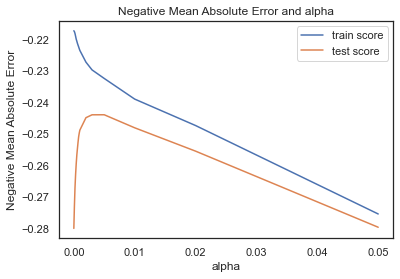

In [193]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [194]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.005)

In [195]:
# check the coefficient values with lambda = 0.005

lasso = Lasso(alpha=0.005)
        
# lasso.fit(X_train, y_train) 
lasso.fit(X_train_lasso, y_train_lasso)
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  0.5673827742569895
Coefficients:
  [-7.44711708e-02  2.69000346e-02  5.20091425e-02 -8.33400857e-03
 -0.00000000e+00  0.00000000e+00  8.52843935e-02  7.88612591e-02
 -7.48431048e-02  1.55580879e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.56365797e-01  5.55473229e-01  0.00000000e+00
  3.20807697e-02  9.22137662e-05 -9.46085931e-02  9.27872330e-04
 -9.85409196e-02  9.22879074e-02  7.04529624e-02  4.77730343e-02
  1.48301036e-02  1.10035422e-02 -3.98203141e-02 -2.03507237e-01
 -8.97993686e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  8.20232866e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.02461777e-01  1.10075771e-01 -2.82193493e-04  1.70972415e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.0000000

In [196]:
##Making predictions for train and test sets: Lasso Regression Model

y_pred_train_l = lasso.predict(X_train_lasso)
y_pred_test_l = lasso.predict(X_test_lasso)

## R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train_lasso, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test_lasso, y_pred= y_pred_test_l)

## Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train_lasso, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test_lasso, y_pred_test_l)

## Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train_lasso, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test_lasso, y_pred_test_l)

## Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

# Count the number of variables
# features = [featurecoeff for featurecoeff in lasso.coef_  if featurecoeff!=0]

variance_lasso_train = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='variance_weighted')
variance_lasso_test = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='variance_weighted')

variance_lasso_train1 = explained_variance_score(y_train_lasso, y_pred_train_l, multioutput='uniform_average')
variance_lasso_test1 = explained_variance_score(y_test_lasso, y_pred_test_l, multioutput='uniform_average')

features = len(lasso.coef_[lasso.coef_ != 0])

print("For Lasso Regression Model (Dropping Top5 Model: alpha=0.005):\n","*"*55)
print(f"Features Count: {features}\n")
print("For Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train,"\nExplained Variance Score 'variance_weighted':",variance_lasso_train,"\nExplained Variance Score 'uniform_average':",variance_lasso_train1)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\nExplained Variance Score 'variance_weighted':",variance_lasso_test,"\nExplained Variance Score 'uniform_average':",variance_lasso_test1,"\n","*"*55)

For Lasso Regression Model (Dropping Top5 Model: alpha=0.005):
 *******************************************************
Features Count: 36

For Train Set:
R2 score: 0.8284690529730411 
MSE score: 0.15013141215498735 
MAE score: 0.23332613754700524 
RMSE score: 0.38746794984229 
Explained Variance Score 'variance_weighted': 0.8284690529730411 
Explained Variance Score 'uniform_average': 0.8284690529730411

For Test Set:
R2 score: 0.8161556445131568 
MSE score: 0.16569658514922353 
MAE score: 0.25756695444240624 
RMSE score: 0.4070584542166193 
Explained Variance Score 'variance_weighted': 0.8164348559741226 
Explained Variance Score 'uniform_average': 0.8164348559741226 
 *******************************************************


In [197]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0             GrLivArea       0.5555                            0.5555
1             House_Age      -0.2035                            0.2035
2       Condition1_Norm       0.1710                            0.1710
3           TotalBsmtSF       0.1564                            0.1564
4            BsmtFinSF1       0.1556                            0.1556
5     Foundation_CBlock      -0.1286                            0.1286
6          SaleType_New       0.1193                            0.1193
7  Neighborhood_Somerst       0.1101                            0.1101
8    Neighborhood_Other       0.1025                            0.1025
9            Functional      -0.0985                            0.0985

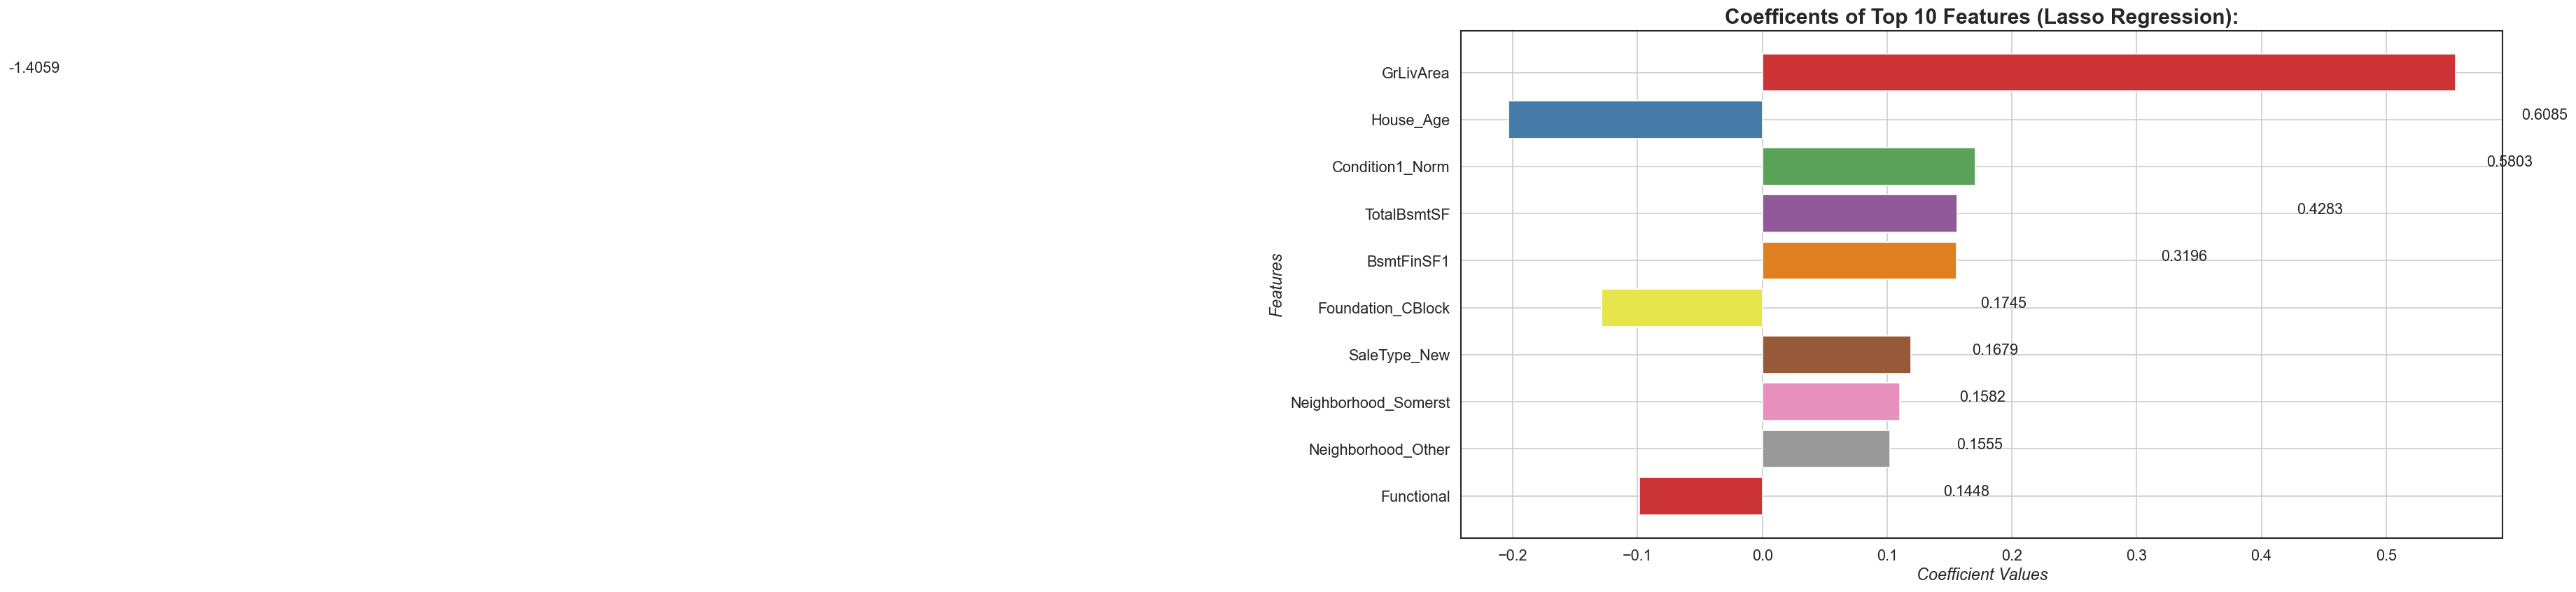

In [198]:
##Coefficient value plot (Lasso Regression)

top10_droptop5_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_droptop5_lasso_df['Features'], x=top10_droptop5_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [199]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_droptop5_lasso_df = list(top10_droptop5_lasso_df['Features'].iloc[0:5])
top5_droptop5_lasso_df

['GrLivArea', 'House_Age', 'Condition1_Norm', 'TotalBsmtSF', 'BsmtFinSF1']

Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed (as it is one of the major assumptions of linear regression).

For Train Set:

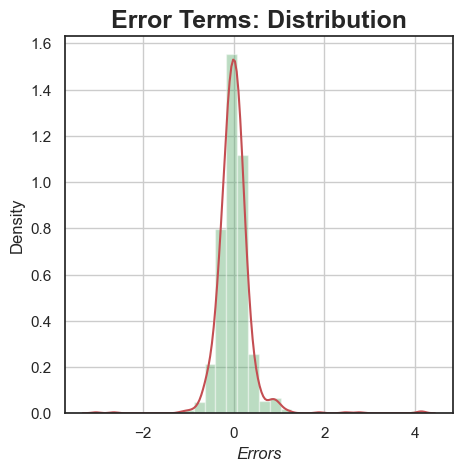

In [200]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train_lasso - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g',  kde_kws={"color": "r", "lw": 1.5})
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

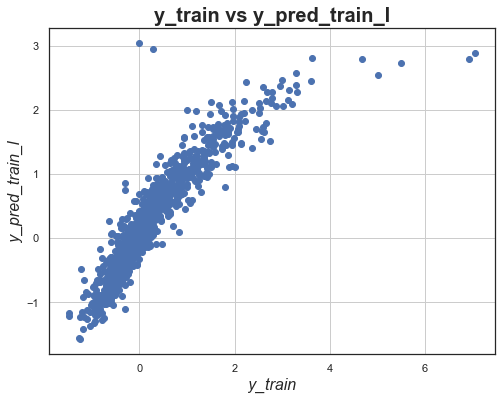

In [201]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train_lasso,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [202]:
y_train_lasso.shape[0]

1021

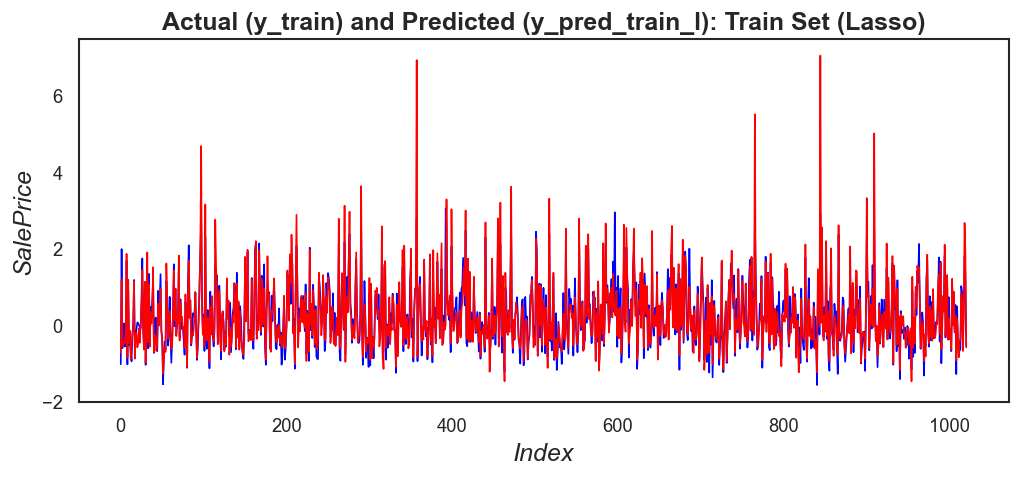

In [203]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,y_train_lasso.shape[0],1)] # Since y_train has 1021 observations
g1 = [i for i in range(0,y_train_lasso.shape[0],1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train_lasso, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

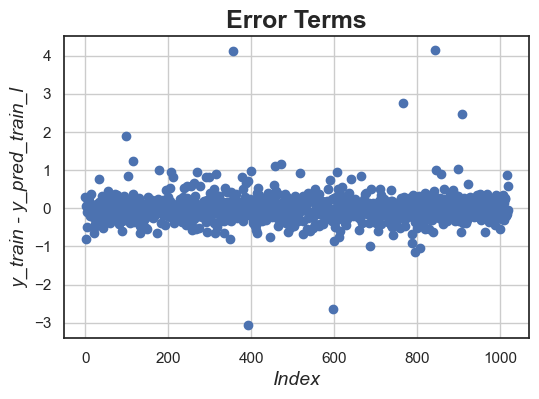

In [204]:

# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,y_train_lasso.shape[0],1)] #For 1021 observations in the train set
res_train1 = (y_train_lasso-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

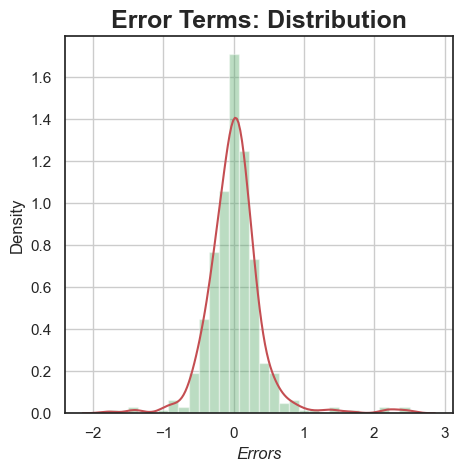

In [205]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test_lasso - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g',  kde_kws={"color": "r", "lw": 1.5})
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

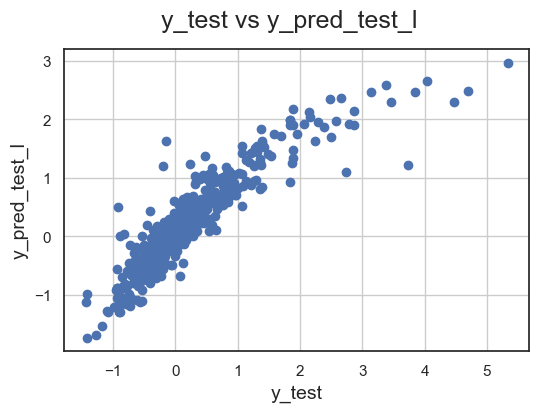

In [206]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test_lasso,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [207]:
y_test_lasso.shape[0]

438

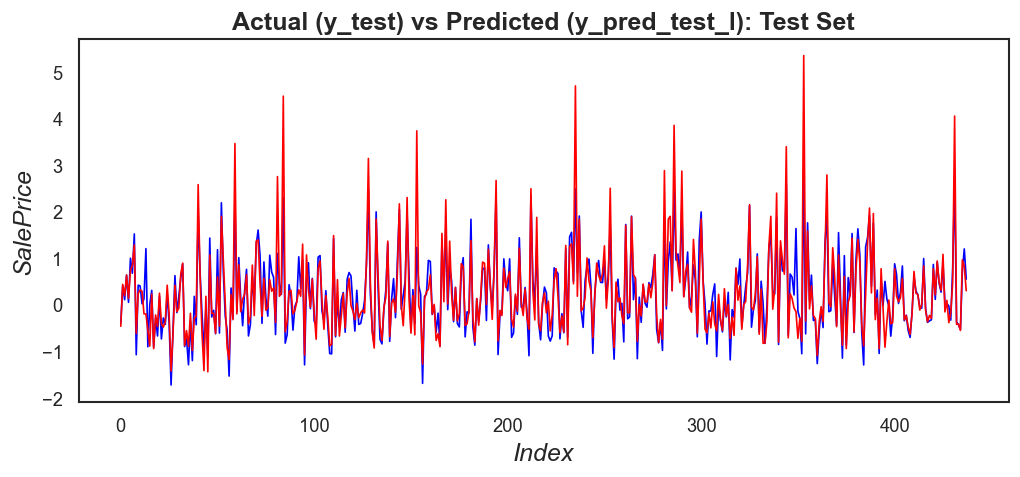

In [208]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,y_test_lasso.shape[0],1)] #As test set has 415 observations
l2 = [i for i in range(0,y_test_lasso.shape[0],1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test_lasso, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

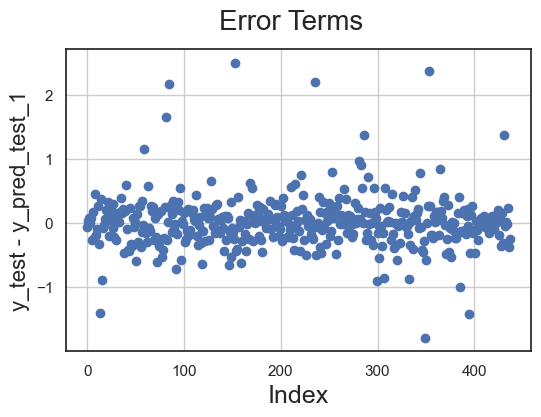

In [209]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,y_test_lasso.shape[0],1)] #For 438 observations in the test set
res_test1 = (y_test_lasso-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

#### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A model needs to be made robust and generalizable so that they are not impacted by outliers in the training data. The model should also be generalisable so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training.  Too much weightage should not given to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outlier analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which it does not make sense to keep must be removed from the dataset. This would help increase the accuracy of the predictions made bythe model. Confidence intervals can be used (typically 3-5 standard deviations). This would help standardize the predictions made by the model. If the model is not robust , it cannot be trusted for predictive analysis.

###### Solution in the Subjective Questions pdf file